In [159]:
# Importing Important Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [160]:
# Reading the Data
bike_share =pd.read_csv('day.csv')
bike_share.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [161]:
# Replacing the numerical values of the column 'season' with the appropriate categorical values 
# related to the values (1,2,3,4) given in the Data dictionary
pd.set_option('display.max_rows',10000)
bike_share[['season']]=bike_share[['season']].apply(lambda x: x.replace({1:'spring',2:'summer',3:'fall',4:'winter'}))
bike_share.head(700)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.181250,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.686950,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,1,0,6,0,1,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,1,0,0,0,2,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,1,0,1,1,2,6.765000,8.112700,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,1,0,2,1,1,5.671653,5.808750,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,1,0,3,1,1,6.184153,7.544400,48.2917,14.958889,41,1280,1321


In [162]:
# Replacing the numerical values of the column 'weathersit' with the appropriate categorical values 
# related to the values (1,2,3,4) given in the Data dictionary
bike_share[['weathersit']]=bike_share[['weathersit']].apply(lambda x: x.replace({1:'clear',2:'mist',3:'light_snow',4:'heavy_rain'}))
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [163]:
# Replacing the numerical values of the column 'weekday' with the appropriate categorical values 
# related to the values {0,1,2,3,4,5,6} given in the Data dictionary
bike_share[['weekday']]=bike_share[['weekday']].apply(lambda x: x.replace({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'}))
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,monday,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [164]:
# Replacing the numerical values of the column 'mnth' with the appropriate categorical values 
# related to the values (1,2,3,4) given in the Data dictionary
bike_share[['mnth']]=bike_share[['mnth']].apply(lambda x: x.replace({1:'january',2:'february',3:'march',4:'april',5:'may',6:'june',7:'july',8:'august',9:'september',10:'october',11:'november',12:'december'}))
bike_share.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,january,0,monday,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,january,0,tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,january,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,january,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,january,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,january,0,saturday,0,clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,january,0,sunday,0,mist,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,january,0,monday,1,mist,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,january,0,tuesday,1,clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,january,0,wednesday,1,clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


## Step 2: Understanding the Target Variable

In [165]:
# Dropping the redundant columns that are 'casual' and 'registered', since the column 'cnt' is the sum of both those columns
bike_share.drop(['casual','registered'],inplace=True,axis=1)
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,0,january,0,monday,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,january,0,tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,january,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,january,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,january,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Since the 'cnt' column represents both the number of casual and registered bike rentals, it will be our Target Variable for the model Building

## Step 3: Data Sanity Check

In [166]:
# Data Sanity Check Begins...

# Number of Columns for bike_share dataset
bike_share.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [167]:
# shape for the bike_share dataset
bike_share.shape # Contains 730 rows and 14 columns

(730, 14)

In [168]:
bike_share.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,210.877136,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [169]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 80.0+ KB


In [170]:
bike_share.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

## thus, there are no missing values and that's why there is no need for imputation.

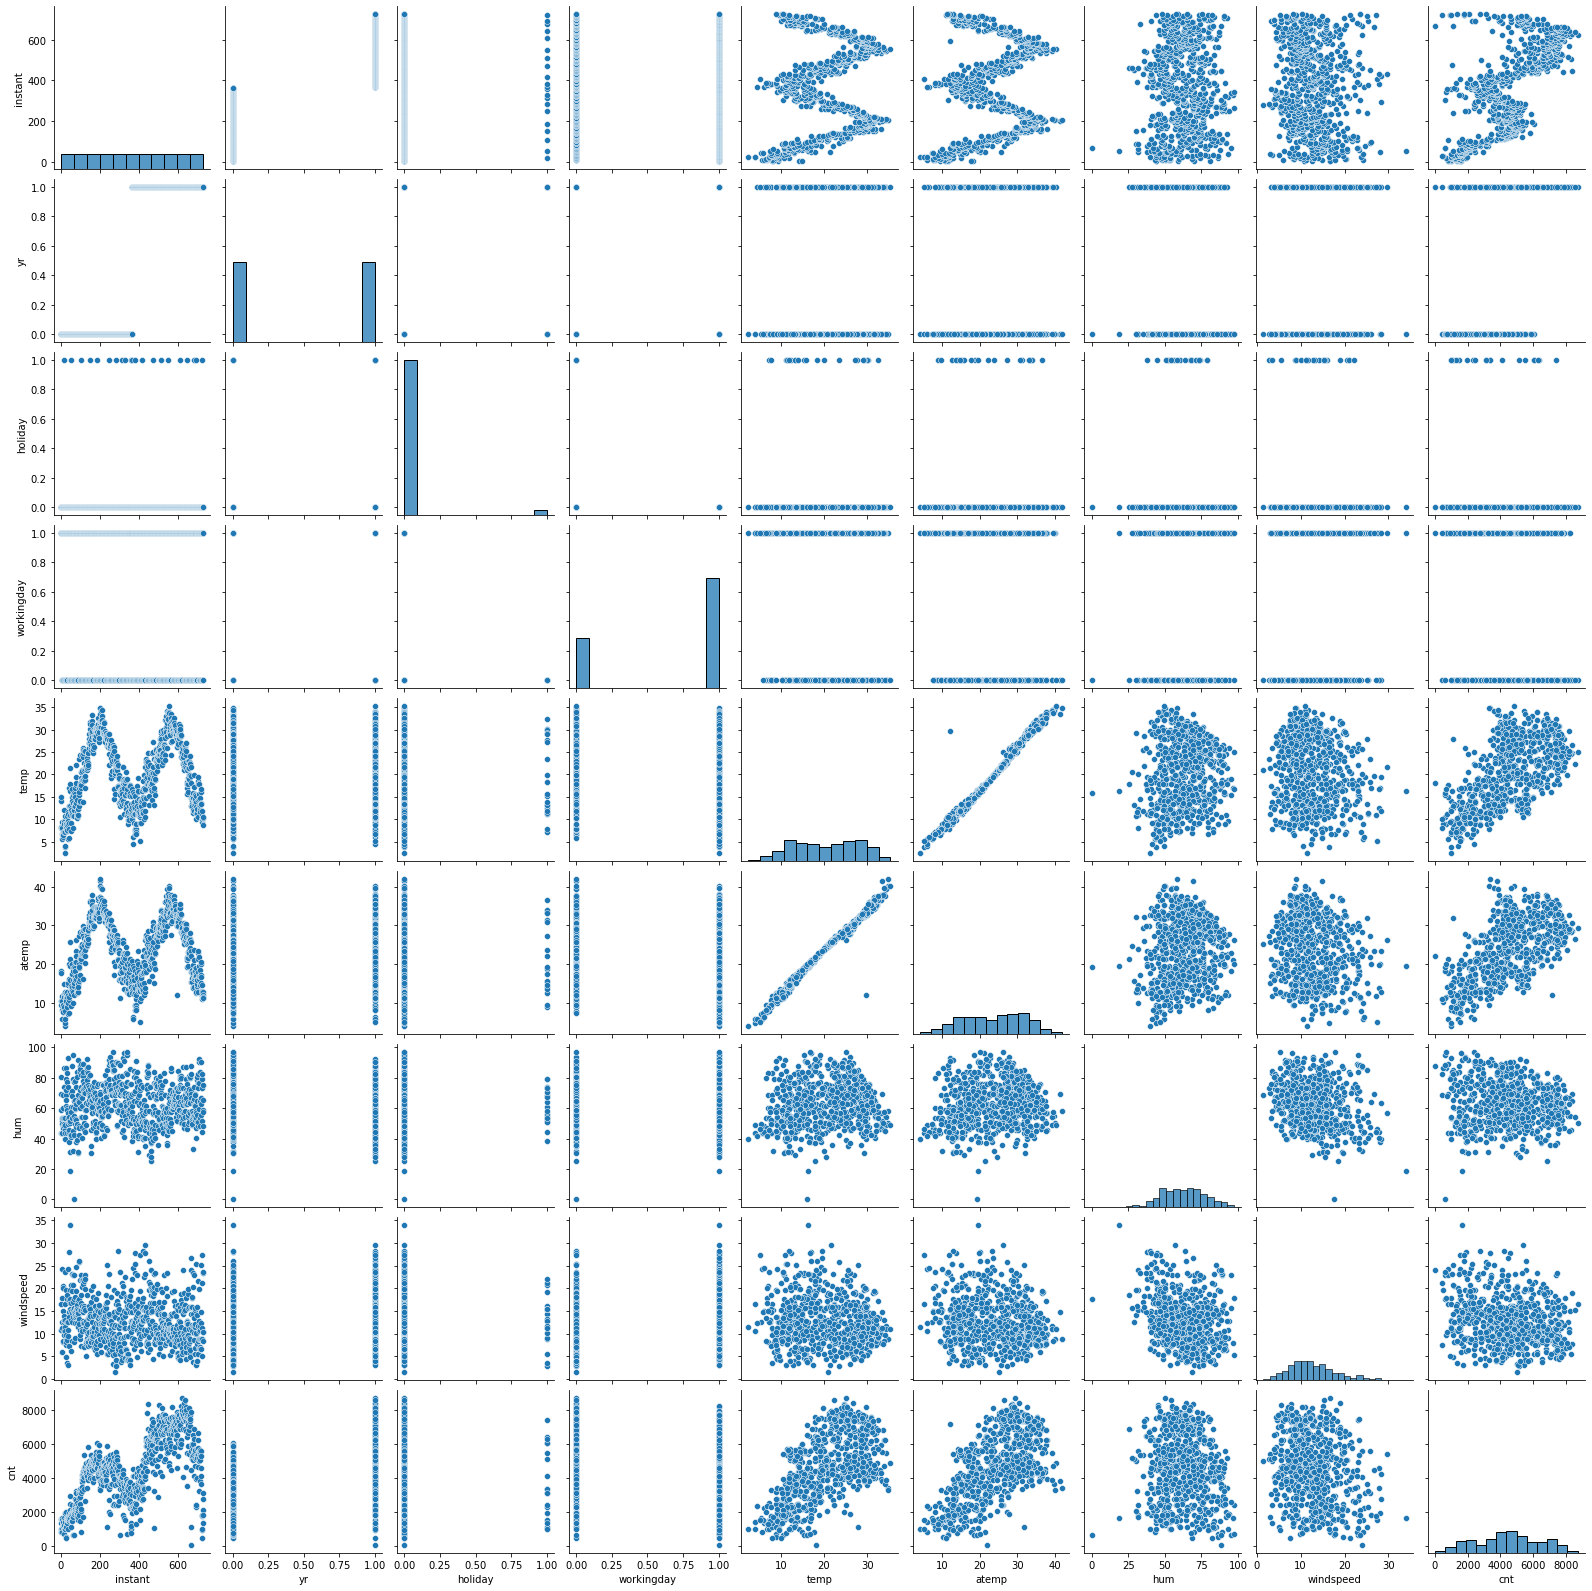

In [171]:
# Visualising the Numerical Variables from Bike_Share Data using pairplot

sns.pairplot(bike_share)
plt.show()

In the above pair plots, we can infer that
- `cnt` is positively correlated to `atemp`, which means "feels like" temperature
- `cnt` is also positively correlated to `temp`, which means the "actual" temperature

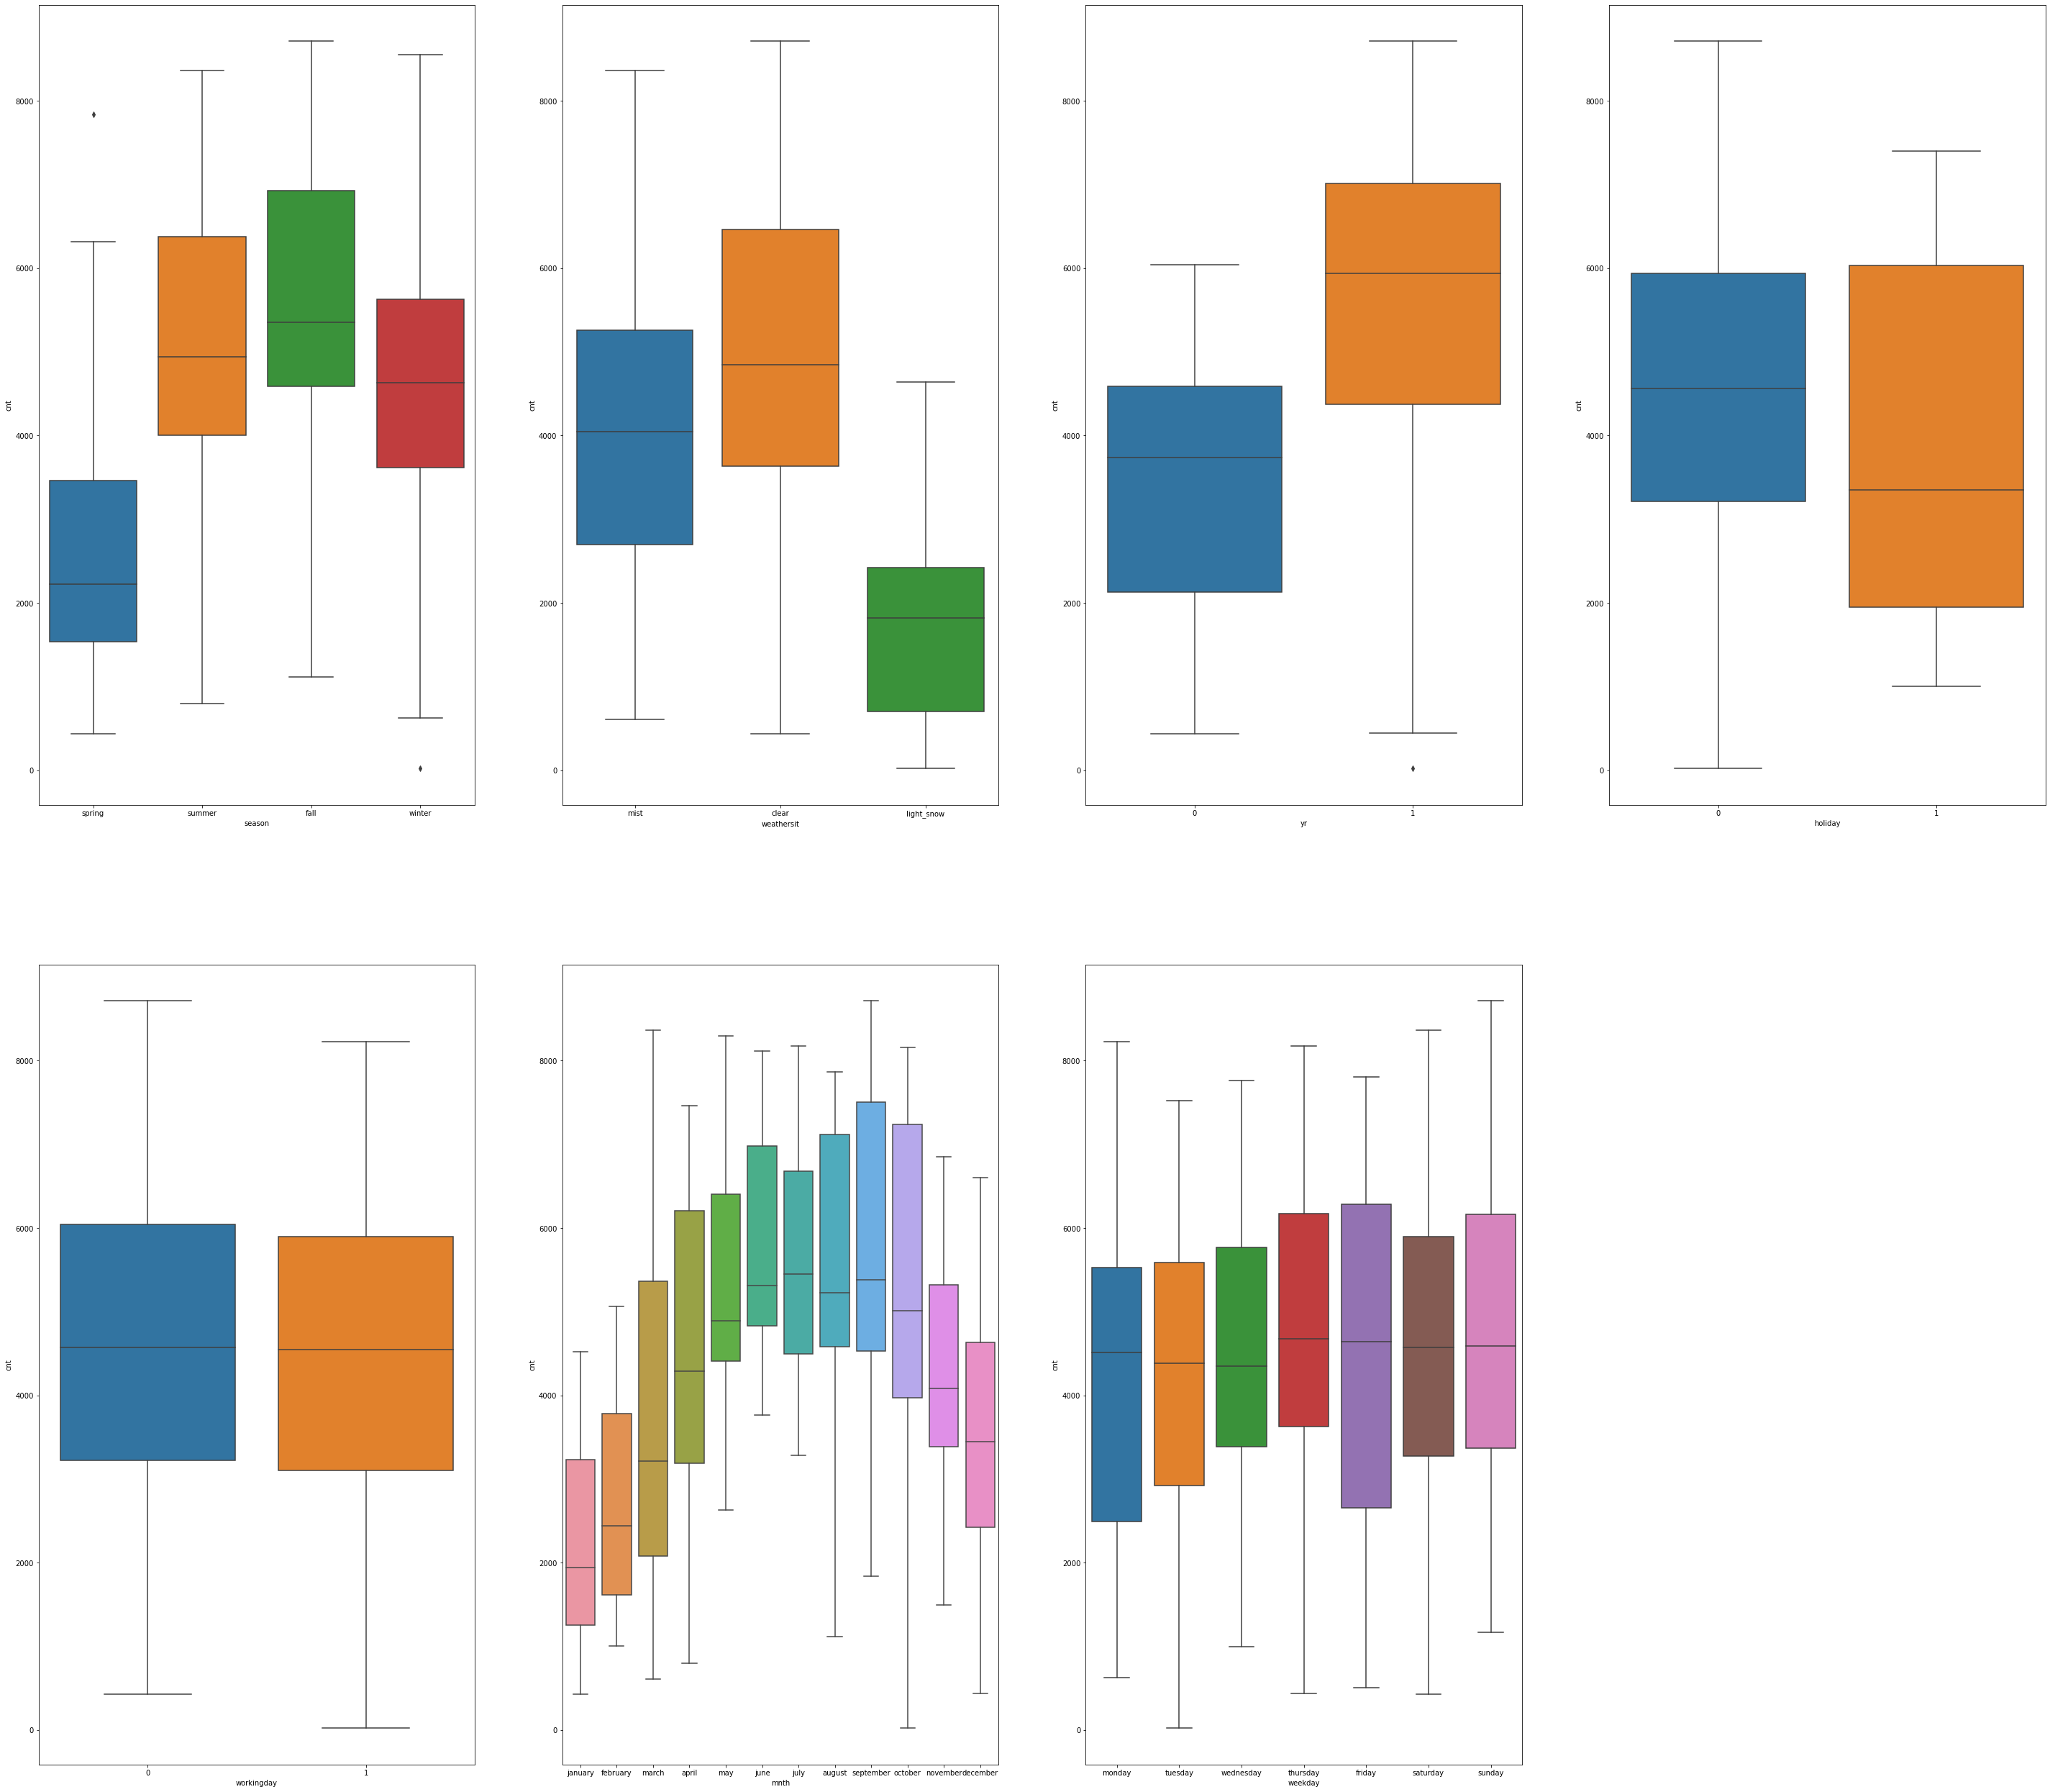

In [172]:
# Visualising Categorical Variables from Bike_Share Data Using Boxplot
plt.figure(figsize=(50,45))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=bike_share)
plt.subplot(2,4,2)
sns.boxplot(x='weathersit',y='cnt',data=bike_share)
plt.subplot(2,4,3)
sns.boxplot(x='yr',y='cnt',data=bike_share)
plt.subplot(2,4,4)
sns.boxplot(x='holiday',y='cnt',data=bike_share)
plt.subplot(2,4,5)
sns.boxplot(x='workingday',y='cnt',data=bike_share)
plt.subplot(2,4,6)
sns.boxplot(x='mnth',y='cnt',data=bike_share)
plt.subplot(2,4,7)
sns.boxplot(x='weekday',y='cnt',data=bike_share)
plt.show()

According to the above two boxplots, we can infer that 
- the highest number of bike rentals is obtained in the Fall Season when the Sky is Clear. 
- The highest number of bike rentals is in the month of September followed by the month of October.
- There were more number of bike rentals in the year 2019.
- Highest number of bike rentals were on Thursday, Friday and Saturday.

## Step 4: Dummy Creation for Categorical Variables (i.e. 'season' & 'weathersit')

In [173]:
#Getting the dummy variables for the features

season_dummy= pd.get_dummies(bike_share['season'],drop_first=True)
weathersit_dummy= pd.get_dummies(bike_share['weathersit'],drop_first=True)
month_dummy= pd.get_dummies(bike_share['mnth'],drop_first=True)
weekday_dummy= pd.get_dummies(bike_share['weekday'],drop_first=True)

In [174]:
# Having a look at season_dummy
season_dummy.head(10)

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


Here, you don't need 4 columns. So, we drop the 'fall' column as the type of seasons could now be represented by the last three columns as follows:
- `000` means `fall`
- `100` means `spring`
- `010` means `summer`
- `001` means `winter`

In [175]:
# having a look at weathersit_dummy 
weathersit_dummy.head(10)

,light_snow,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,1
7,0,1
8,0,0
9,0,0


Here, you don't need 3 columns. So, we drop the 'clear' column as the type of weathersit could now be represented by the last two columns as follows:
- `10` means `light_snow`
- `01` means `mist`
- `00` means `clear`

In [176]:
# having a look at month_dummy
month_dummy.head()

,august,december,february,january,july,june,march,may,november,october,september
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [177]:
# having a look at weekday_dummy
weekday_dummy.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


## Step 5(a): Exploratory Data Analysis (i.e. Univariate & Bivariate)

### For Season

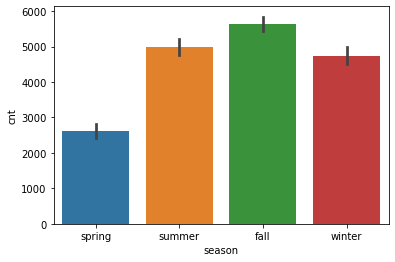

In [178]:
# Displaying barplot between season and cnt of bike rentals

sns.barplot('season','cnt',data=bike_share)
plt.show()

As one can observe that the bike rentals were the highest in the `Fall` Season.

### For Weathersit

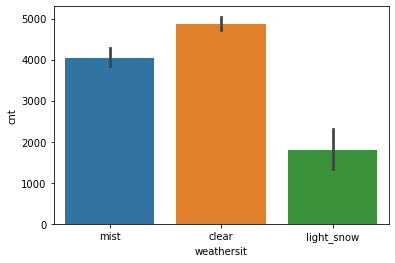

In [179]:
# Displaying barplot between weathersit and cnt of bike rentals

sns.barplot('weathersit','cnt',data=bike_share)
plt.show()

From the above bar plot, we observe that the bike rentals were the highest when the sky was `clear`.

### for Year

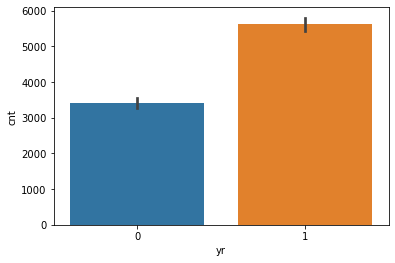

In [180]:
# Displaying barplot between yr and cnt of bike rentals

sns.barplot('yr','cnt',data=bike_share)
plt.show()

In the above bar graph, we observe that the bike rentals were highest in the year `2019` which is represented by `1`.

### For Holiday

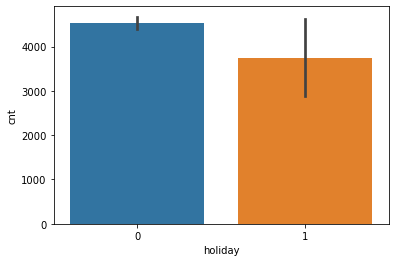

In [181]:
# Displaying barplot between holiday and cnt of bike rentals

sns.barplot('holiday','cnt',data=bike_share)
plt.show()

In the above bar graph, we observe that the bike rentals were highest for non-holiday days.

### For Month

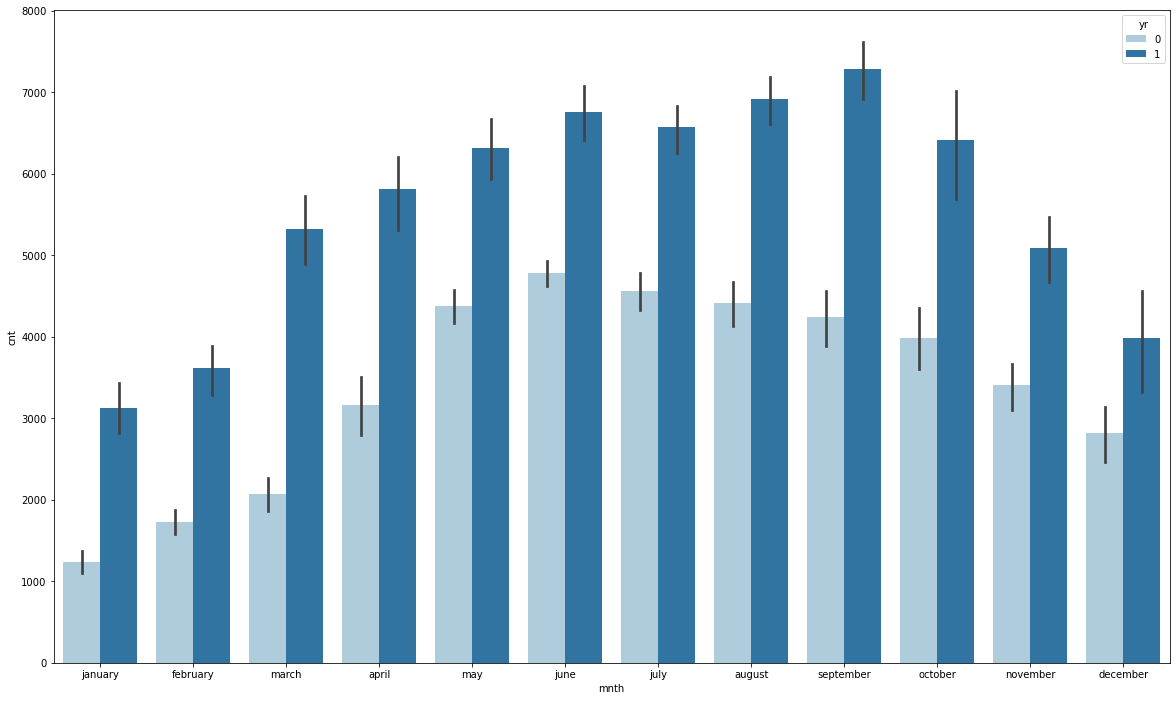

In [182]:
# Displaying barplot between mnth and cnt of bike rentals
plt.figure(figsize=(20,12))
sns.barplot('mnth','cnt',data=bike_share,hue='yr',palette='Paired')
plt.show()

In the above paired bar graph, The bike rentals were highest in the year 2019(for the most part) for the month of September, October and August.

In [183]:
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,0,january,0,monday,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,january,0,tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,january,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,january,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,january,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### For Humidity

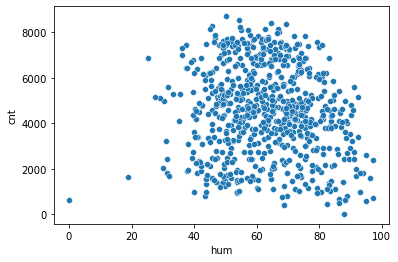

In [184]:
# Displaying scatterplot between humidity and cnt of bike rentals

sns.scatterplot('hum','cnt',data=bike_share)
plt.show()

 Bike rentals are more when there is high humidity

### For Temperature

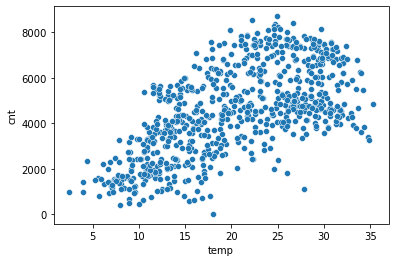

In [185]:
# Displaying scatterplot between temp and cnt of bike rentals

sns.scatterplot('temp','cnt',data=bike_share)
plt.show()

In the above scatter plot, temperature and count of bike rentals are positively correlated and the highest bike rentals are observed at higher temperatures.

### Looking at the HeatMap

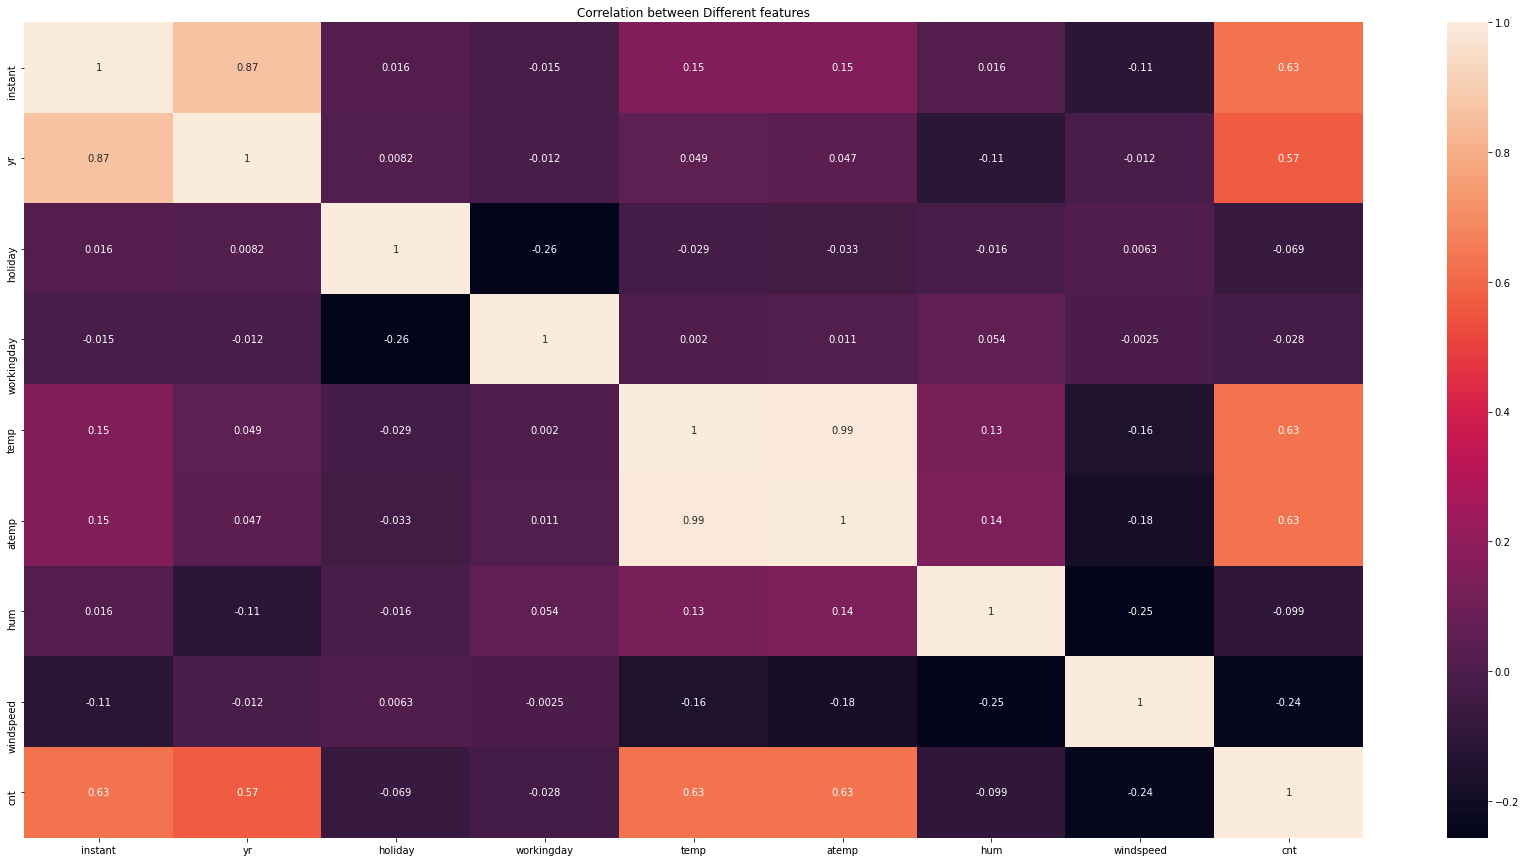

In [186]:
# Displaying the heatmap to observe the correlations between different features
plt.figure(figsize=(30,15))
sns.heatmap(bike_share.corr(),annot=True)
plt.title("Correlation between Different features")
plt.show()

From the Vibrant HeatMap, we can infer that
- `cnt` is positively correlated to `temp` and `atemp` with correlation values both equal to `0.63`
- `cnt` is positively correlated to `yr` with the correlation value equal to `0.57`
- `cnt` is negatively correlated to humidity `hum` and `windspeed`

## Step 5(b): Exploratory Data Analysis (i.e. Univariate & Bivariate) on an Updated Dataframe

In [187]:
# Combining the dummy variables with the original bike_share dataset
pd.set_option('display.max_columns',10000)
bike_share=pd.concat([month_dummy,weekday_dummy,weathersit_dummy,season_dummy,bike_share],axis=1)
bike_share.head()

,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist,spring,summer,winter,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,01-01-2018,spring,0,january,0,monday,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,2,02-01-2018,spring,0,january,0,tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,3,03-01-2018,spring,0,january,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4,04-01-2018,spring,0,january,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,05-01-2018,spring,0,january,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [188]:
# Now dropping season,mnth,weekday,weathersit, atemp since they would be redundant
# and dropping instant,dteday since they are irrelevant
bike_share.drop(['season','mnth','weekday','weathersit','instant','dteday','atemp'],axis=1,inplace=True)
bike_share.head()

,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [189]:
# Checking the shape of the Updated Dataframe
bike_share.shape

(730, 29)

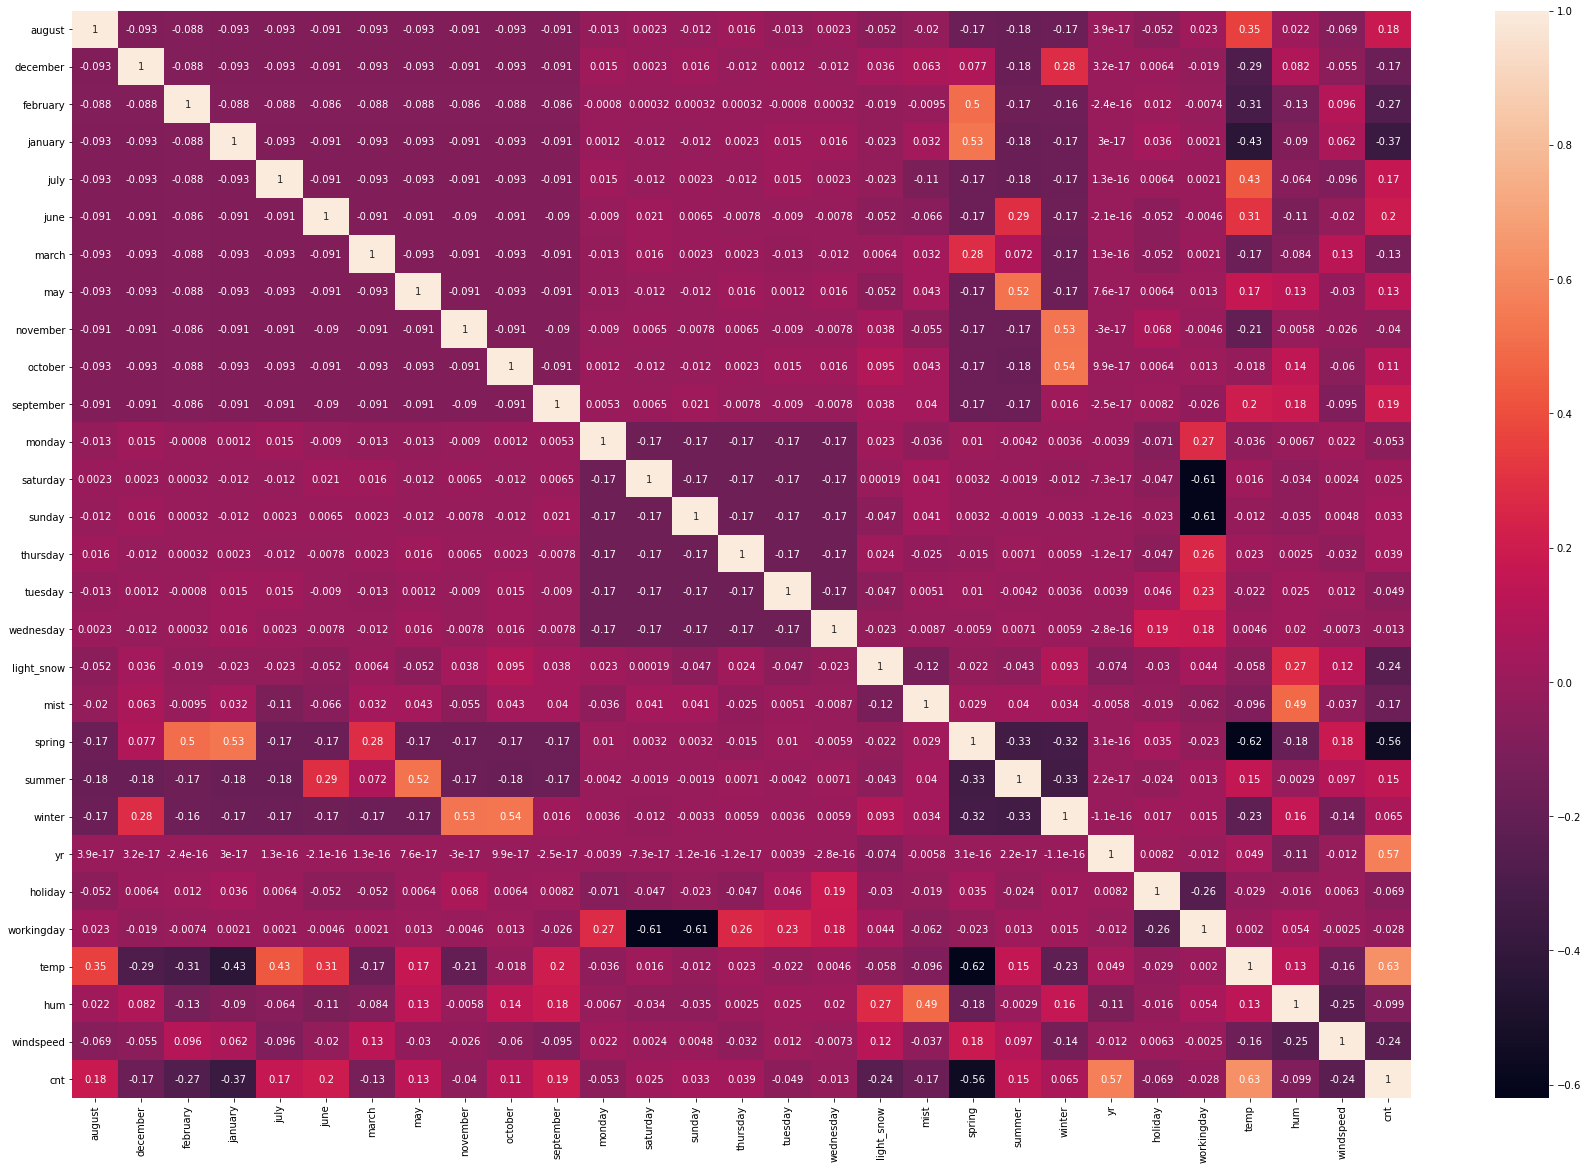

In [190]:
# Now Displaying the Final HeatMap of the Updated Dataframe
# to see the correlation between features

plt.figure(figsize=(30,20))
sns.heatmap(bike_share.corr(),annot=True)
plt.show()



The features like Temperature, year and the months from June to October are in good correlation with `cnt`

## Step 6: Train_Test_Split

In [191]:
# Splitting the bike_share dataset into training set (70 percent) and test set (30 percent)
bike_share_train,bike_share_test=train_test_split(bike_share,train_size=0.7,random_state= 1000)

In [192]:
# Checking the rows and columns after the train_test_split

print(bike_share_train.shape)
print(bike_share_test.shape)

(510, 29)
(220, 29)


## Step 7: Rescaling the features (Using the MinMax Scaler Method, also known as Normalisation)

In [193]:
# Creating an instance of Minmax object
scaling = MinMaxScaler()

#Storing numerical variables of bike_share in a list
numeric_var=['temp','hum','windspeed','cnt']

#Fitting on Data
bike_share_train[numeric_var]=scaling.fit_transform(bike_share_train[numeric_var])
bike_share_train.head()

,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
674,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0.240884,0.584370,0.311545,0.651634
477,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0.294252,0.790039,0.579511,0.367234
176,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.762572,0.528982,0.148724,0.607800
655,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0.556729,0.750536,0.442296,0.861367
607,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.872573,0.605410,0.301278,0.843074


In [194]:
# Describing the numerical variables after MinMax Scaling
bike_share_train.describe()

,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.082353,0.080392,0.076471,0.088235,0.082353,0.092157,0.086275,0.094118,0.076471,0.088235,0.068627,0.143137,0.147059,0.147059,0.131373,0.147059,0.141176,0.027451,0.347059,0.250980,0.266667,0.233333,0.500000,0.025490,0.684314,0.521807,0.650814,0.347649,0.514320
std,0.275172,0.272166,0.266010,0.283915,0.275172,0.289531,0.281045,0.292279,0.266010,0.283915,0.253068,0.350557,0.354512,0.354512,0.338139,0.354512,0.348545,0.163554,0.476502,0.434003,0.442651,0.423368,0.500491,0.157763,0.465245,0.238554,0.145303,0.161315,0.220002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.318212,0.540738,0.232053,0.367234
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.520243,0.655431,0.330128,0.513921
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.750000,1.000000,0.000000,1.000000,0.000000,1.000000,0.732077,0.754508,0.435596,0.676542
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now after MinMax scaling, we can see that all the values of the features range between 0 and 1

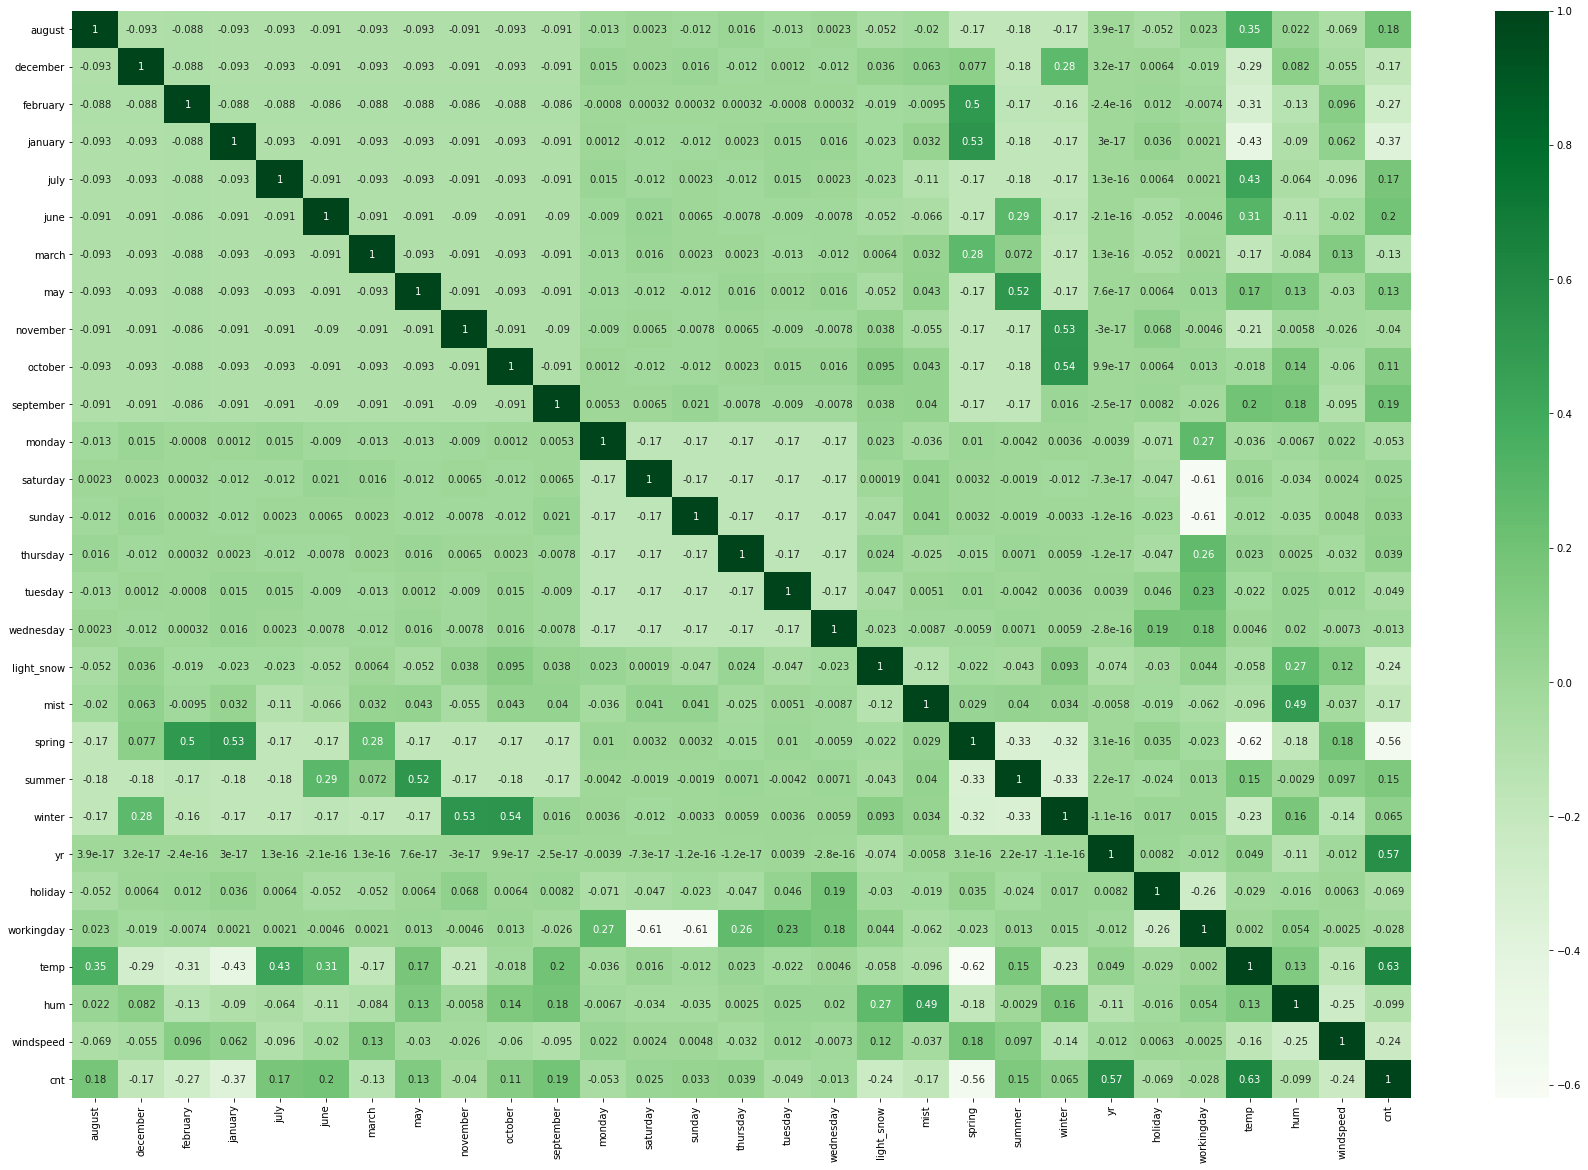

In [195]:
# Now displaying the Heatmap after scaling the features 
#to look at the correlation coefficients between features

plt.figure(figsize=(30,20))
sns.heatmap(bike_share.corr(),annot=True,cmap='Greens')
plt.show()


The features like Temperature, Year, the Summer Season and the months from May to October are in good correlation with `cnt`

### Dividing the Train Data into X and y to build the Model

In [196]:
y_train =bike_share_train.pop('cnt')
X_train =bike_share_train

## Step 8: Building the Model on train data

In [197]:
# Adding a constant
X_train_const= sm.add_constant(X_train[['temp']])

# Creating our first fitted model
linreg= sm.OLS(y_train,X_train_const).fit()

In [198]:
# Checking the parameters obtained
linreg.params

const    0.213398
temp     0.576692
dtype: float64

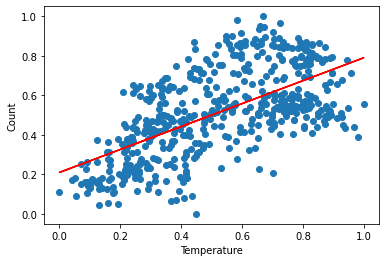

In [199]:
# Let's visualise the split data with the scatter plot and the fitted regression line

plt.scatter(X_train_const.iloc[:,1],y_train)
plt.plot(X_train_const.iloc[:,1],0.21+0.58*X_train_const.iloc[:,1],'r')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()


From the above graph, we can observe that there is almost a linear relationship between Temperature and the Count of Bike Rentals

In [200]:
# Getting the Summary of Our Linear Regression Model
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     326.2
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           1.09e-56
Time:                        14:24:59   Log-Likelihood:                 175.52
No. Observations:                 510   AIC:                            -347.0
Df Residuals:                     508   BIC:                            -338.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2134      0.018     11.650      0.000       0.177       0.249
temp           0.5767      0.032     18.061      0.000       0.514       0.639
==============================================================================
Omnibus:                       17.381   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.233
Skew:                           0.181   Prob(JB):                      0.00600
Kurtosis:                       2.408   Cond. No.                         5.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the Value of R-Squared is 0.391, we have to add another feature to get a higher value of R-Squared.

### Adding another variable

In [201]:
# assigning another feature ('yr') to X 
X_train_const= X_train[['temp','yr']]

In [202]:
# Building another model after adding 'yr'
X_train_const= sm.add_constant(X_train_const)

linreg=sm.OLS(y_train,X_train_const).fit()

linreg.params

const    0.099659
temp     0.573573
yr       0.230734
dtype: float64

In [203]:
# Now Checking the summary
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     506.7
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.23e-121
Time:                        14:24:59   Log-Likelihood:                 329.10
No. Observations:                 510   AIC:                            -652.2
Df Residuals:                     507   BIC:                            -639.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0997      0.015      6.797      0.000       0.071       0.128
temp           0.5736      0.024     24.251      0.000       0.527       0.620
yr             0.2307      0.011     20.467      0.000       0.209       0.253
==============================================================================
Omnibus:                       31.073   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.633
Skew:                          -0.525   Prob(JB):                     2.48e-09
Kurtosis:                       3.873   Cond. No.                         6.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After another feature 'yr', there is a massive improvement on the value of R-Squared from `0.391` to `0.667`.
Let's See if we can improve it further.

In [204]:
# Adding another feature 'summer' to the model
X_train_const= X_train[['temp','yr','summer']]

In [205]:
# Building another model after adding the feature 'summer'
X_train_const=sm.add_constant(X_train_const)

linreg= sm.OLS(y_train,X_train_const).fit()

linreg.params

const     0.097034
temp      0.566279
yr        0.230756
summer    0.024073
dtype: float64

In [206]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     340.6
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          5.51e-121
Time:                        14:24:59   Log-Likelihood:                 330.85
No. Observations:                 510   AIC:                            -653.7
Df Residuals:                     506   BIC:                            -636.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0970      0.015      6.604      0.000       0.068       0.126
temp           0.5663      0.024     23.679      0.000       0.519       0.613
yr             0.2308      0.011     20.519      0.000       0.209       0.253
summer         0.0241      0.013      1.868      0.062      -0.001       0.049
==============================================================================
Omnibus:                       30.410   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.930
Skew:                          -0.504   Prob(JB):                     2.14e-09
Kurtosis:                       3.928   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
# Adding another feature 'june' to the model
X_train_const= X_train[['temp','yr','summer','june']]

In [208]:
# Building another model after adding the feature 'june'
X_train_const=sm.add_constant(X_train_const)

linreg= sm.OLS(y_train,X_train_const).fit()

linreg.params

const     0.094836
temp      0.571848
yr        0.230920
summer    0.026435
june     -0.015403
dtype: float64

In [209]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     255.4
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          8.52e-120
Time:                        14:24:59   Log-Likelihood:                 331.11
No. Observations:                 510   AIC:                            -652.2
Df Residuals:                     505   BIC:                            -631.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0948      0.015      6.318      0.000       0.065       0.124
temp           0.5718      0.025     22.750      0.000       0.522       0.621
yr             0.2309      0.011     20.520      0.000       0.209       0.253
summer         0.0264      0.013      1.987      0.047       0.000       0.053
june          -0.0154      0.021     -0.723      0.470      -0.057       0.026
==============================================================================
Omnibus:                       31.043   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.879
Skew:                          -0.511   Prob(JB):                     1.33e-09
Kurtosis:                       3.937   Cond. No.                         6.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value of 'june'(0.470) is higher than 0.05, we drop this feature

In [210]:
X_train_const.drop(['june'],axis=1,inplace=True)

In [211]:
X_train_const.head()

,const,temp,yr,summer
674,1.0,0.240884,1,0
477,1.0,0.294252,1,1
176,1.0,0.762572,0,0
655,1.0,0.556729,1,0
607,1.0,0.872573,1,0


In [212]:
# building another model without the feature 'june'
X_train_const=sm.add_constant(X_train_const)

linreg= sm.OLS(y_train,X_train_const).fit()

linreg.params


const     0.097034
temp      0.566279
yr        0.230756
summer    0.024073
dtype: float64

In [213]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     340.6
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          5.51e-121
Time:                        14:24:59   Log-Likelihood:                 330.85
No. Observations:                 510   AIC:                            -653.7
Df Residuals:                     506   BIC:                            -636.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0970      0.015      6.604      0.000       0.068       0.126
temp           0.5663      0.024     23.679      0.000       0.519       0.613
yr             0.2308      0.011     20.519      0.000       0.209       0.253
summer         0.0241      0.013      1.868      0.062      -0.001       0.049
==============================================================================
Omnibus:                       30.410   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.930
Skew:                          -0.504   Prob(JB):                     2.14e-09
Kurtosis:                       3.928   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
# Adding another feature 'september' to the model
X_train_const= X_train[['temp','yr','summer','september']]

In [215]:
# building another model with the feature 'september'
X_train_const=sm.add_constant(X_train_const)

linreg= sm.OLS(y_train,X_train_const).fit()

linreg.params


const        0.097935
temp         0.550026
yr           0.232167
summer       0.031997
september    0.069388
dtype: float64

In [216]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     261.9
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.20e-121
Time:                        14:24:59   Log-Likelihood:                 335.42
No. Observations:                 510   AIC:                            -660.8
Df Residuals:                     505   BIC:                            -639.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0979      0.015      6.717      0.000       0.069       0.127
temp           0.5500      0.024     22.610      0.000       0.502       0.598
yr             0.2322      0.011     20.792      0.000       0.210       0.254
summer         0.0320      0.013      2.452      0.015       0.006       0.058
september      0.0694      0.023      3.023      0.003       0.024       0.114
==============================================================================
Omnibus:                       35.885   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.106
Skew:                          -0.564   Prob(JB):                     3.58e-11
Kurtosis:                       3.995   Cond. No.                         6.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [217]:
# Adding another feature 'july' to the model
X_train_const= X_train[['temp','yr','summer','september','july']]

In [218]:
# building another model with the feature 'july'
X_train_const=sm.add_constant(X_train_const)

linreg= sm.OLS(y_train,X_train_const).fit()

linreg.params


const        0.083185
temp         0.603907
yr           0.232267
summer       0.015104
september    0.047090
july        -0.089617
dtype: float64

In [219]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     217.7
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          2.05e-123
Time:                        14:25:00   Log-Likelihood:                 342.44
No. Observations:                 510   AIC:                            -672.9
Df Residuals:                     504   BIC:                            -647.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0832      0.015      5.575      0.000       0.054       0.113
temp           0.6039      0.028     21.580      0.000       0.549       0.659
yr             0.2323      0.011     21.068      0.000       0.211       0.254
summer         0.0151      0.014      1.107      0.269      -0.012       0.042
september      0.0471      0.023      2.010      0.045       0.001       0.093
july          -0.0896      0.024     -3.751      0.000      -0.137      -0.043
==============================================================================
Omnibus:                       39.595   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.276
Skew:                          -0.600   Prob(JB):                     1.64e-12
Kurtosis:                       4.056   Cond. No.                         8.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
# removing 'july' feature since its coefficient is negative

X_train_const.drop(['july'],axis=1,inplace=True)
X_train_const.head()


,const,temp,yr,summer,september
674,1.0,0.240884,1,0,0
477,1.0,0.294252,1,1,0
176,1.0,0.762572,0,0,0
655,1.0,0.556729,1,0,0
607,1.0,0.872573,1,0,0


In [221]:
# building another model without the feature 'july'
X_train_const=sm.add_constant(X_train_const)

linreg= sm.OLS(y_train,X_train_const).fit()

linreg.params


const        0.097935
temp         0.550026
yr           0.232167
summer       0.031997
september    0.069388
dtype: float64

In [222]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     261.9
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.20e-121
Time:                        14:25:00   Log-Likelihood:                 335.42
No. Observations:                 510   AIC:                            -660.8
Df Residuals:                     505   BIC:                            -639.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0979      0.015      6.717      0.000       0.069       0.127
temp           0.5500      0.024     22.610      0.000       0.502       0.598
yr             0.2322      0.011     20.792      0.000       0.210       0.254
summer         0.0320      0.013      2.452      0.015       0.006       0.058
september      0.0694      0.023      3.023      0.003       0.024       0.114
==============================================================================
Omnibus:                       35.885   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.106
Skew:                          -0.564   Prob(JB):                     3.58e-11
Kurtosis:                       3.995   Cond. No.                         6.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding all the variables to the model

In [223]:
# Displaying all the columns of bike_share
bike_share.columns

Index(['august', 'december', 'february', 'january', 'july', 'june', 'march',
       'may', 'november', 'october', 'september', 'monday', 'saturday',
       'sunday', 'thursday', 'tuesday', 'wednesday', 'light_snow', 'mist',
       'spring', 'summer', 'winter', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed', 'cnt'],
      dtype='object')

In [224]:
X_train.columns

Index(['august', 'december', 'february', 'january', 'july', 'june', 'march',
       'may', 'november', 'october', 'september', 'monday', 'saturday',
       'sunday', 'thursday', 'tuesday', 'wednesday', 'light_snow', 'mist',
       'spring', 'summer', 'winter', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [225]:
# Building a linear model with all the features

X_train_const = sm.add_constant(X_train)

linreg1 = sm.OLS(y_train,X_train_const).fit()

linreg1.params

const         0.360889
august       -0.027463
december     -0.098908
february     -0.052481
january      -0.069651
july         -0.077773
june         -0.015707
march        -0.009955
may           0.029562
november     -0.084932
october      -0.032996
september     0.037486
monday       -0.011083
saturday      0.048548
sunday        0.058110
thursday     -0.007463
tuesday      -0.032919
wednesday    -0.020410
light_snow   -0.254286
mist         -0.054756
spring       -0.084484
summer       -0.007924
winter        0.108775
yr            0.230950
holiday      -0.039183
workingday    0.049515
temp          0.420556
hum          -0.167336
windspeed    -0.154797
dtype: float64

In [226]:
linreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     94.51
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          7.09e-176
Time:                        14:25:00   Log-Likelihood:                 526.42
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     481   BIC:                            -872.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3609      0.085      4.251      0.000       0.194       0.528
august        -0.0275      0.033     -0.823      0.411      -0.093       0.038
december      -0.0989      0.035     -2.858      0.004      -0.167      -0.031
february      -0.0525      0.034     -1.557      0.120      -0.119       0.014
january       -0.0697      0.035     -1.986      0.048      -0.139      -0.001
july          -0.0778      0.034     -2.256      0.025      -0.146      -0.010
june          -0.0157      0.024     -0.646      0.518      -0.063       0.032
march         -0.0100      0.026     -0.376      0.707      -0.062       0.042
may            0.0296      0.021      1.435      0.152      -0.011       0.070
november      -0.0849      0.037     -2.266      0.024      -0.159      -0.011
october       -0.0330      0.036     -0.914      0.361      -0.104       0.038
september      0.0375      0.032      1.188      0.235      -0.025       0.099
monday        -0.0111      0.015     -0.749      0.454      -0.040       0.018
saturday       0.0485      0.072      0.674      0.501      -0.093       0.190
sunday         0.0581      0.071      0.824      0.411      -0.081       0.197
thursday      -0.0075      0.015     -0.494      0.622      -0.037       0.022
tuesday       -0.0329      0.015     -2.219      0.027      -0.062      -0.004
wednesday     -0.0204      0.015     -1.346      0.179      -0.050       0.009
light_snow    -0.2543      0.027     -9.357      0.000      -0.308      -0.201
mist          -0.0548      0.011     -5.102      0.000      -0.076      -0.034
spring        -0.0845      0.030     -2.787      0.006      -0.144      -0.025
summer        -0.0079      0.025     -0.319      0.750      -0.057       0.041
winter         0.1088      0.029      3.739      0.000       0.052       0.166
yr             0.2310      0.008     28.825      0.000       0.215       0.247
holiday       -0.0392      0.065     -0.606      0.545      -0.166       0.088
workingday     0.0495      0.071      0.699      0.485      -0.090       0.189
temp           0.4206      0.046      9.178      0.000       0.331       0.511
hum           -0.1673      0.039     -4.249      0.000      -0.245      -0.090
windspeed     -0.1548      0.027     -5.700      0.000      -0.208      -0.101
==============================================================================
Omnibus:                       78.078   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.930
Skew:                          -0.724   Prob(JB):                     7.15e-51
Kurtosis:                       5.961   Cond. No.                         70.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

Looking at the summary, we can see that there are some features that have high p-values (greater than 0.05), which makes them insignificant. Maybe, we could drop thise Features Using VIF(Variance Inflation Factor), which is used to check the correlation between features.

### Checking VIF

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [227]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,workingday,61.20
26,hum,43.08
25,temp,41.18
19,spring,14.32
12,saturday,13.60
13,sunday,13.00
21,winter,12.68
20,summer,9.56
9,october,7.05
27,windspeed,6.88


Since we want a VIF less than 5, then we clearly have to drop features with VIFs greater than 5

### Dropping the Features with High P-values and low VIFs first and then Dropping features with low p-values and High VIFs and updating the Model

In [228]:
X_update= X_train.drop('workingday',axis=1,)

In [229]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg2= sm.OLS(y_train,X_train_const).fit()
linreg.params

const        0.097935
temp         0.550026
yr           0.232167
summer       0.031997
september    0.069388
dtype: float64

In [230]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     98.10
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          9.02e-177
Time:                        14:25:00   Log-Likelihood:                 526.16
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     482   BIC:                            -877.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4114      0.045      9.240      0.000       0.324       0.499
august        -0.0277      0.033     -0.830      0.407      -0.093       0.038
december      -0.1008      0.034     -2.922      0.004      -0.169      -0.033
february      -0.0535      0.034     -1.590      0.113      -0.120       0.013
january       -0.0710      0.035     -2.029      0.043      -0.140      -0.002
july          -0.0781      0.034     -2.265      0.024      -0.146      -0.010
june          -0.0159      0.024     -0.653      0.514      -0.064       0.032
march         -0.0107      0.026     -0.405      0.685      -0.063       0.041
may            0.0288      0.021      1.399      0.162      -0.012       0.069
november      -0.0859      0.037     -2.295      0.022      -0.159      -0.012
october       -0.0346      0.036     -0.960      0.337      -0.105       0.036
september      0.0367      0.032      1.164      0.245      -0.025       0.099
monday        -0.0110      0.015     -0.741      0.459      -0.040       0.018
saturday      -0.0008      0.015     -0.052      0.959      -0.030       0.028
sunday         0.0099      0.015      0.671      0.503      -0.019       0.039
thursday      -0.0073      0.015     -0.482      0.630      -0.037       0.022
tuesday       -0.0330      0.015     -2.229      0.026      -0.062      -0.004
wednesday     -0.0212      0.015     -1.402      0.161      -0.051       0.008
light_snow    -0.2548      0.027     -9.386      0.000      -0.308      -0.201
mist          -0.0550      0.011     -5.133      0.000      -0.076      -0.034
spring        -0.0851      0.030     -2.810      0.005      -0.145      -0.026
summer        -0.0081      0.025     -0.327      0.744      -0.057       0.041
winter         0.1093      0.029      3.761      0.000       0.052       0.166
yr             0.2306      0.008     28.852      0.000       0.215       0.246
holiday       -0.0805      0.026     -3.074      0.002      -0.132      -0.029
temp           0.4185      0.046      9.157      0.000       0.329       0.508
hum           -0.1664      0.039     -4.230      0.000      -0.244      -0.089
windspeed     -0.1534      0.027     -5.667      0.000      -0.207      -0.100
==============================================================================
Omnibus:                       79.183   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.274
Skew:                          -0.739   Prob(JB):                     6.02e-51
Kurtosis:                       5.950   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
X_update= X_train.drop(['saturday','workingday'],axis=1,)

In [232]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg2= sm.OLS(y_train,X_train_const).fit()
linreg.params

const        0.097935
temp         0.550026
yr           0.232167
summer       0.031997
september    0.069388
dtype: float64

In [233]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     102.1
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          8.84e-178
Time:                        14:25:00   Log-Likelihood:                 526.16
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     483   BIC:                            -884.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.044      9.375      0.000       0.325       0.497
august        -0.0277      0.033     -0.832      0.406      -0.093       0.038
december      -0.1008      0.034     -2.927      0.004      -0.168      -0.033
february      -0.0535      0.034     -1.591      0.112      -0.120       0.013
january       -0.0710      0.035     -2.032      0.043      -0.140      -0.002
july          -0.0781      0.034     -2.269      0.024      -0.146      -0.010
june          -0.0159      0.024     -0.654      0.513      -0.064       0.032
march         -0.0107      0.026     -0.406      0.685      -0.063       0.041
may            0.0288      0.021      1.400      0.162      -0.012       0.069
november      -0.0859      0.037     -2.298      0.022      -0.159      -0.012
october       -0.0346      0.036     -0.962      0.337      -0.105       0.036
september      0.0366      0.031      1.164      0.245      -0.025       0.098
monday        -0.0106      0.013     -0.827      0.409      -0.036       0.015
sunday         0.0103      0.013      0.811      0.418      -0.015       0.035
thursday      -0.0069      0.013     -0.525      0.600      -0.033       0.019
tuesday       -0.0327      0.013     -2.546      0.011      -0.058      -0.007
wednesday     -0.0208      0.013     -1.579      0.115      -0.047       0.005
light_snow    -0.2548      0.027     -9.396      0.000      -0.308      -0.202
mist          -0.0550      0.011     -5.144      0.000      -0.076      -0.034
spring        -0.0851      0.030     -2.815      0.005      -0.145      -0.026
summer        -0.0081      0.025     -0.328      0.743      -0.057       0.041
winter         0.1093      0.029      3.765      0.000       0.052       0.166
yr             0.2306      0.008     28.890      0.000       0.215       0.246
holiday       -0.0805      0.026     -3.077      0.002      -0.132      -0.029
temp           0.4185      0.046      9.169      0.000       0.329       0.508
hum           -0.1663      0.039     -4.241      0.000      -0.243      -0.089
windspeed     -0.1534      0.027     -5.675      0.000      -0.207      -0.100
==============================================================================
Omnibus:                       79.181   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.294
Skew:                          -0.739   Prob(JB):                     5.96e-51
Kurtosis:                       5.950   Cond. No.                         34.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_update.columns
vif['VIF'] = [variance_inflation_factor(X_update.values, i) for i in range(X_update.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,hum,37.04
23,temp,35.66
18,spring,13.12
20,winter,12.19
19,summer,6.74
9,october,6.54
25,windspeed,5.88
8,november,5.69
3,january,5.64
4,july,5.52


In [235]:
# dropping 'august' variable also
X_update= X_train.drop(['saturday','workingday','august'],axis=1,)

In [236]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg2= sm.OLS(y_train,X_train_const).fit()

In [237]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     106.2
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.20e-178
Time:                        14:25:00   Log-Likelihood:                 525.79
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     484   BIC:                            -889.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3962      0.040      9.891      0.000       0.318       0.475
december      -0.0917      0.033     -2.809      0.005      -0.156      -0.028
february      -0.0470      0.033     -1.437      0.151      -0.111       0.017
january       -0.0656      0.034     -1.911      0.057      -0.133       0.002
july          -0.0543      0.019     -2.834      0.005      -0.092      -0.017
june          -0.0025      0.018     -0.138      0.890      -0.038       0.033
march         -0.0043      0.025     -0.169      0.866      -0.054       0.045
may            0.0358      0.019      1.913      0.056      -0.001       0.073
november      -0.0749      0.035     -2.143      0.033      -0.144      -0.006
october       -0.0217      0.032     -0.669      0.504      -0.085       0.042
september      0.0566      0.020      2.780      0.006       0.017       0.097
monday        -0.0109      0.013     -0.852      0.395      -0.036       0.014
sunday         0.0105      0.013      0.831      0.406      -0.014       0.035
thursday      -0.0072      0.013     -0.551      0.582      -0.033       0.019
tuesday       -0.0327      0.013     -2.553      0.011      -0.058      -0.008
wednesday     -0.0218      0.013     -1.664      0.097      -0.048       0.004
light_snow    -0.2547      0.027     -9.396      0.000      -0.308      -0.201
mist          -0.0554      0.011     -5.182      0.000      -0.076      -0.034
spring        -0.0753      0.028     -2.706      0.007      -0.130      -0.021
summer         0.0059      0.018      0.327      0.744      -0.030       0.042
winter         0.1159      0.028      4.152      0.000       0.061       0.171
yr             0.2310      0.008     28.996      0.000       0.215       0.247
holiday       -0.0797      0.026     -3.051      0.002      -0.131      -0.028
temp           0.4064      0.043      9.394      0.000       0.321       0.491
hum           -0.1651      0.039     -4.216      0.000      -0.242      -0.088
windspeed     -0.1508      0.027     -5.618      0.000      -0.204      -0.098
==============================================================================
Omnibus:                       79.797   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.811
Skew:                          -0.741   Prob(JB):                     6.23e-52
Kurtosis:                       5.984   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_update.columns
vif['VIF'] = [variance_inflation_factor(X_update.values, i) for i in range(X_update.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,hum,36.14
22,temp,22.43
17,spring,11.99
19,winter,11.65
24,windspeed,5.87
8,october,5.79
2,january,5.64
7,november,5.41
0,december,4.80
1,february,4.70


In [239]:
# dropping 'thursday' variable also
X_update= X_train.drop(['saturday','workingday','august','thursday'],axis=1,)

In [240]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg2= sm.OLS(y_train,X_train_const).fit()


In [241]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     110.8
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.31e-179
Time:                        14:25:00   Log-Likelihood:                 525.63
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     485   BIC:                            -895.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3943      0.040      9.887      0.000       0.316       0.473
december      -0.0913      0.033     -2.800      0.005      -0.155      -0.027
february      -0.0472      0.033     -1.444      0.149      -0.111       0.017
january       -0.0652      0.034     -1.902      0.058      -0.133       0.002
july          -0.0541      0.019     -2.827      0.005      -0.092      -0.017
june          -0.0022      0.018     -0.122      0.903      -0.038       0.033
march         -0.0045      0.025     -0.177      0.860      -0.054       0.045
may            0.0361      0.019      1.930      0.054      -0.001       0.073
november      -0.0744      0.035     -2.132      0.034      -0.143      -0.006
october       -0.0216      0.032     -0.667      0.505      -0.085       0.042
september      0.0572      0.020      2.814      0.005       0.017       0.097
monday        -0.0086      0.012     -0.713      0.476      -0.032       0.015
sunday         0.0128      0.012      1.065      0.287      -0.011       0.036
tuesday       -0.0305      0.012     -2.511      0.012      -0.054      -0.007
wednesday     -0.0196      0.012     -1.572      0.117      -0.044       0.005
light_snow    -0.2544      0.027     -9.393      0.000      -0.308      -0.201
mist          -0.0552      0.011     -5.171      0.000      -0.076      -0.034
spring        -0.0754      0.028     -2.713      0.007      -0.130      -0.021
summer         0.0059      0.018      0.323      0.746      -0.030       0.041
winter         0.1158      0.028      4.151      0.000       0.061       0.171
yr             0.2309      0.008     29.012      0.000       0.215       0.247
holiday       -0.0796      0.026     -3.048      0.002      -0.131      -0.028
temp           0.4061      0.043      9.395      0.000       0.321       0.491
hum           -0.1658      0.039     -4.237      0.000      -0.243      -0.089
windspeed     -0.1505      0.027     -5.613      0.000      -0.203      -0.098
==============================================================================
Omnibus:                       78.961   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.656
Skew:                          -0.734   Prob(JB):                     3.02e-51
Kurtosis:                       5.966   Cond. No.                         31.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Using RFE(Recursive Feature Elimination)

In [242]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train_const, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train_const, y_train)

In [243]:
list(zip(X_train_const.columns,rfe.support_,rfe.ranking_))

[('const', False, 16),
 ('december', False, 3),
 ('february', False, 7),
 ('january', False, 6),
 ('july', True, 1),
 ('june', False, 15),
 ('march', False, 14),
 ('may', False, 5),
 ('november', False, 4),
 ('october', False, 10),
 ('september', True, 1),
 ('monday', False, 12),
 ('sunday', False, 11),
 ('tuesday', False, 8),
 ('wednesday', False, 9),
 ('light_snow', True, 1),
 ('mist', False, 2),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [244]:
colu=X_train_const.columns[rfe.support_]
colu

Index(['july', 'september', 'light_snow', 'spring', 'winter', 'yr', 'holiday',
       'temp', 'hum', 'windspeed'],
      dtype='object')

In [245]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     110.8
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.31e-179
Time:                        14:25:00   Log-Likelihood:                 525.63
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     485   BIC:                            -895.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3943      0.040      9.887      0.000       0.316       0.473
december      -0.0913      0.033     -2.800      0.005      -0.155      -0.027
february      -0.0472      0.033     -1.444      0.149      -0.111       0.017
january       -0.0652      0.034     -1.902      0.058      -0.133       0.002
july          -0.0541      0.019     -2.827      0.005      -0.092      -0.017
june          -0.0022      0.018     -0.122      0.903      -0.038       0.033
march         -0.0045      0.025     -0.177      0.860      -0.054       0.045
may            0.0361      0.019      1.930      0.054      -0.001       0.073
november      -0.0744      0.035     -2.132      0.034      -0.143      -0.006
october       -0.0216      0.032     -0.667      0.505      -0.085       0.042
september      0.0572      0.020      2.814      0.005       0.017       0.097
monday        -0.0086      0.012     -0.713      0.476      -0.032       0.015
sunday         0.0128      0.012      1.065      0.287      -0.011       0.036
tuesday       -0.0305      0.012     -2.511      0.012      -0.054      -0.007
wednesday     -0.0196      0.012     -1.572      0.117      -0.044       0.005
light_snow    -0.2544      0.027     -9.393      0.000      -0.308      -0.201
mist          -0.0552      0.011     -5.171      0.000      -0.076      -0.034
spring        -0.0754      0.028     -2.713      0.007      -0.130      -0.021
summer         0.0059      0.018      0.323      0.746      -0.030       0.041
winter         0.1158      0.028      4.151      0.000       0.061       0.171
yr             0.2309      0.008     29.012      0.000       0.215       0.247
holiday       -0.0796      0.026     -3.048      0.002      -0.131      -0.028
temp           0.4061      0.043      9.395      0.000       0.321       0.491
hum           -0.1658      0.039     -4.237      0.000      -0.243      -0.089
windspeed     -0.1505      0.027     -5.613      0.000      -0.203      -0.098
==============================================================================
Omnibus:                       78.961   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.656
Skew:                          -0.734   Prob(JB):                     3.02e-51
Kurtosis:                       5.966   Cond. No.                         31.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_update.columns
vif['VIF'] = [variance_inflation_factor(X_update.values, i) for i in range(X_update.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,hum,35.94
21,temp,22.23
16,spring,11.98
18,winter,11.65
23,windspeed,5.87
8,october,5.78
2,january,5.64
7,november,5.41
0,december,4.80
1,february,4.69


In [247]:
X_train_const.head()

,const,december,february,january,july,june,march,may,november,october,september,monday,sunday,tuesday,wednesday,light_snow,mist,spring,summer,winter,yr,holiday,temp,hum,windspeed
674,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0.240884,0.584370,0.311545
477,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0.294252,0.790039,0.579511
176,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.762572,0.528982,0.148724
655,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0.556729,0.750536,0.442296
607,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.872573,0.605410,0.301278


In [248]:
# dropping 'march' feature
X_update= X_train_const.drop('march',1,)

In [249]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg2= sm.OLS(y_train,X_train_const).fit()


In [250]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     115.8
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.22e-180
Time:                        14:25:00   Log-Likelihood:                 525.62
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     486   BIC:                            -901.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3921      0.038     10.384      0.000       0.318       0.466
december      -0.0878      0.026     -3.429      0.001      -0.138      -0.037
february      -0.0429      0.022     -1.983      0.048      -0.085      -0.000
january       -0.0607      0.022     -2.698      0.007      -0.105      -0.016
july          -0.0540      0.019     -2.826      0.005      -0.092      -0.016
june          -0.0019      0.018     -0.105      0.916      -0.037       0.034
may            0.0367      0.018      1.996      0.046       0.001       0.073
november      -0.0714      0.030     -2.348      0.019      -0.131      -0.012
october       -0.0190      0.029     -0.662      0.508      -0.075       0.037
september      0.0581      0.020      2.969      0.003       0.020       0.097
monday        -0.0085      0.012     -0.708      0.479      -0.032       0.015
sunday         0.0128      0.012      1.074      0.283      -0.011       0.036
tuesday       -0.0303      0.012     -2.508      0.012      -0.054      -0.007
wednesday     -0.0195      0.012     -1.569      0.117      -0.044       0.005
light_snow    -0.2542      0.027     -9.401      0.000      -0.307      -0.201
mist          -0.0552      0.011     -5.175      0.000      -0.076      -0.034
spring        -0.0782      0.023     -3.460      0.001      -0.123      -0.034
summer         0.0059      0.018      0.325      0.745      -0.030       0.041
winter         0.1141      0.026      4.365      0.000       0.063       0.165
yr             0.2309      0.008     29.040      0.000       0.215       0.246
holiday       -0.0795      0.026     -3.048      0.002      -0.131      -0.028
temp           0.4085      0.041      9.957      0.000       0.328       0.489
hum           -0.1659      0.039     -4.246      0.000      -0.243      -0.089
windspeed     -0.1502      0.027     -5.620      0.000      -0.203      -0.098
==============================================================================
Omnibus:                       78.801   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.230
Skew:                          -0.734   Prob(JB):                     6.15e-51
Kurtosis:                       5.954   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [251]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_update.columns
vif['VIF'] = [variance_inflation_factor(X_update.values, i) for i in range(X_update.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,92.97
18,winter,7.97
16,spring,6.27
21,temp,6.23
8,october,4.30
7,november,4.26
17,summer,4.18
1,december,3.16
3,january,2.65
2,february,2.15


In [252]:
# dropping 'summer' feature
X_update= X_train_const.drop('summer',1,)

In [253]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg2= sm.OLS(y_train,X_train_const).fit()


In [254]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     121.3
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.15e-181
Time:                        14:25:01   Log-Likelihood:                 525.56
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     487   BIC:                            -907.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3985      0.032     12.371      0.000       0.335       0.462
december      -0.0902      0.024     -3.700      0.000      -0.138      -0.042
february      -0.0441      0.021     -2.078      0.038      -0.086      -0.002
january       -0.0627      0.022     -2.901      0.004      -0.105      -0.020
july          -0.0552      0.019     -2.941      0.003      -0.092      -0.018
june           0.0002      0.017      0.009      0.992      -0.033       0.033
may            0.0397      0.016      2.505      0.013       0.009       0.071
november      -0.0740      0.029     -2.527      0.012      -0.132      -0.016
october       -0.0205      0.028     -0.727      0.467      -0.076       0.035
september      0.0560      0.018      3.037      0.003       0.020       0.092
monday        -0.0085      0.012     -0.708      0.479      -0.032       0.015
sunday         0.0129      0.012      1.078      0.282      -0.011       0.036
tuesday       -0.0305      0.012     -2.522      0.012      -0.054      -0.007
wednesday     -0.0196      0.012     -1.577      0.116      -0.044       0.005
light_snow    -0.2546      0.027     -9.432      0.000      -0.308      -0.202
mist          -0.0553      0.011     -5.192      0.000      -0.076      -0.034
spring        -0.0826      0.018     -4.525      0.000      -0.118      -0.047
winter         0.1117      0.025      4.450      0.000       0.062       0.161
yr             0.2310      0.008     29.126      0.000       0.215       0.247
holiday       -0.0789      0.026     -3.035      0.003      -0.130      -0.028
temp           0.4010      0.034     11.797      0.000       0.334       0.468
hum           -0.1644      0.039     -4.241      0.000      -0.241      -0.088
windspeed     -0.1493      0.027     -5.622      0.000      -0.201      -0.097
==============================================================================
Omnibus:                       79.268   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.733
Skew:                          -0.735   Prob(JB):                     1.07e-51
Kurtosis:                       5.981   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_update.columns
vif['VIF'] = [variance_inflation_factor(X_update.values, i) for i in range(X_update.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,67.78
17,winter,7.37
20,temp,4.29
8,october,4.18
16,spring,4.09
7,november,3.96
1,december,2.87
3,january,2.45
2,february,2.08
21,hum,2.07


In [256]:
# dropping 'october' feature
X_update= X_train_const.drop('october',1,)

In [257]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg2= sm.OLS(y_train,X_train_const).fit()


In [258]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     127.2
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.31e-182
Time:                        14:25:01   Log-Likelihood:                 525.28
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     488   BIC:                            -913.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3991      0.032     12.400      0.000       0.336       0.462
december      -0.0784      0.018     -4.330      0.000      -0.114      -0.043
february      -0.0404      0.021     -1.962      0.050      -0.081    5.96e-05
january       -0.0589      0.021     -2.810      0.005      -0.100      -0.018
july          -0.0542      0.019     -2.898      0.004      -0.091      -0.017
june           0.0010      0.017      0.060      0.952      -0.032       0.034
may            0.0408      0.016      2.590      0.010       0.010       0.072
november      -0.0579      0.019     -3.014      0.003      -0.096      -0.020
september      0.0606      0.017      3.496      0.001       0.027       0.095
monday        -0.0085      0.012     -0.703      0.483      -0.032       0.015
sunday         0.0128      0.012      1.072      0.284      -0.011       0.036
tuesday       -0.0305      0.012     -2.529      0.012      -0.054      -0.007
wednesday     -0.0194      0.012     -1.561      0.119      -0.044       0.005
light_snow    -0.2552      0.027     -9.465      0.000      -0.308      -0.202
mist          -0.0551      0.011     -5.177      0.000      -0.076      -0.034
spring        -0.0854      0.018     -4.792      0.000      -0.120      -0.050
winter         0.0968      0.014      6.734      0.000       0.069       0.125
yr             0.2308      0.008     29.132      0.000       0.215       0.246
holiday       -0.0806      0.026     -3.116      0.002      -0.131      -0.030
temp           0.4009      0.034     11.800      0.000       0.334       0.468
hum           -0.1665      0.039     -4.305      0.000      -0.242      -0.090
windspeed     -0.1498      0.027     -5.644      0.000      -0.202      -0.098
==============================================================================
Omnibus:                       82.071   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.794
Skew:                          -0.752   Prob(JB):                     5.73e-55
Kurtosis:                       6.081   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_update.columns
vif['VIF'] = [variance_inflation_factor(X_update.values, i) for i in range(X_update.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,67.73
19,temp,4.29
15,spring,3.91
16,winter,2.42
3,january,2.31
20,hum,2.06
2,february,1.96
4,july,1.73
7,november,1.71
14,mist,1.68


In [260]:
# dropping 'sunday' feature
X_update= X_train_const.drop('sunday',1,)

In [261]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg2= sm.OLS(y_train,X_train_const).fit()


In [262]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     133.4
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.98e-183
Time:                        14:25:01   Log-Likelihood:                 524.68
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     489   BIC:                            -918.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4024      0.032     12.557      0.000       0.339       0.465
december      -0.0779      0.018     -4.304      0.000      -0.113      -0.042
february      -0.0408      0.021     -1.978      0.048      -0.081      -0.000
january       -0.0595      0.021     -2.838      0.005      -0.101      -0.018
july          -0.0535      0.019     -2.859      0.004      -0.090      -0.017
june           0.0009      0.017      0.056      0.955      -0.032       0.034
may            0.0407      0.016      2.586      0.010       0.010       0.072
november      -0.0587      0.019     -3.054      0.002      -0.096      -0.021
september      0.0614      0.017      3.548      0.000       0.027       0.095
monday        -0.0118      0.012     -1.013      0.311      -0.035       0.011
tuesday       -0.0340      0.012     -2.919      0.004      -0.057      -0.011
wednesday     -0.0229      0.012     -1.907      0.057      -0.046       0.001
light_snow    -0.2568      0.027     -9.537      0.000      -0.310      -0.204
mist          -0.0551      0.011     -5.174      0.000      -0.076      -0.034
spring        -0.0851      0.018     -4.774      0.000      -0.120      -0.050
winter         0.0967      0.014      6.727      0.000       0.068       0.125
yr             0.2309      0.008     29.135      0.000       0.215       0.246
holiday       -0.0792      0.026     -3.067      0.002      -0.130      -0.028
temp           0.3997      0.034     11.768      0.000       0.333       0.466
hum           -0.1661      0.039     -4.295      0.000      -0.242      -0.090
windspeed     -0.1487      0.027     -5.606      0.000      -0.201      -0.097
==============================================================================
Omnibus:                       79.533   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.896
Skew:                          -0.722   Prob(JB):                     2.44e-54
Kurtosis:                       6.088   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [263]:
# dropping 'june' feature
X_update= X_train_const.drop('june',1,)

In [264]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg2= sm.OLS(y_train,X_train_const).fit()


In [265]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     140.7
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.65e-184
Time:                        14:25:01   Log-Likelihood:                 524.68
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     490   BIC:                            -924.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4024      0.032     12.572      0.000       0.340       0.465
december      -0.0778      0.018     -4.329      0.000      -0.113      -0.042
february      -0.0407      0.021     -1.981      0.048      -0.081      -0.000
january       -0.0594      0.021     -2.858      0.004      -0.100      -0.019
july          -0.0539      0.017     -3.194      0.001      -0.087      -0.021
may            0.0405      0.015      2.706      0.007       0.011       0.070
november      -0.0586      0.019     -3.061      0.002      -0.096      -0.021
september      0.0612      0.017      3.662      0.000       0.028       0.094
monday        -0.0118      0.012     -1.013      0.312      -0.035       0.011
tuesday       -0.0339      0.012     -2.922      0.004      -0.057      -0.011
wednesday     -0.0228      0.012     -1.908      0.057      -0.046       0.001
light_snow    -0.2568      0.027     -9.554      0.000      -0.310      -0.204
mist          -0.0550      0.011     -5.189      0.000      -0.076      -0.034
spring        -0.0852      0.018     -4.819      0.000      -0.120      -0.050
winter         0.0965      0.014      6.851      0.000       0.069       0.124
yr             0.2309      0.008     29.165      0.000       0.215       0.246
holiday       -0.0793      0.026     -3.073      0.002      -0.130      -0.029
temp           0.4004      0.031     12.739      0.000       0.339       0.462
hum           -0.1664      0.038     -4.354      0.000      -0.241      -0.091
windspeed     -0.1487      0.026     -5.618      0.000      -0.201      -0.097
==============================================================================
Omnibus:                       79.411   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.329
Skew:                          -0.721   Prob(JB):                     3.24e-54
Kurtosis:                       6.084   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [266]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_update.columns
vif['VIF'] = [variance_inflation_factor(X_update.values, i) for i in range(X_update.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,67.11
13,spring,3.85
17,temp,3.67
14,winter,2.33
3,january,2.27
18,hum,2.01
2,february,1.95
6,november,1.70
12,mist,1.67
1,december,1.56


In [267]:
# dropping 'may' feature
X_update= X_train_const.drop('may',1,)

In [268]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg2= sm.OLS(y_train,X_train_const).fit()


In [269]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     146.3
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          4.96e-184
Time:                        14:25:01   Log-Likelihood:                 520.90
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     491   BIC:                            -923.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4011      0.032     12.452      0.000       0.338       0.464
december      -0.0793      0.018     -4.390      0.000      -0.115      -0.044
february      -0.0410      0.021     -1.983      0.048      -0.082      -0.000
january       -0.0604      0.021     -2.888      0.004      -0.101      -0.019
july          -0.0630      0.017     -3.787      0.000      -0.096      -0.030
november      -0.0600      0.019     -3.116      0.002      -0.098      -0.022
september      0.0520      0.016      3.158      0.002       0.020       0.084
monday        -0.0130      0.012     -1.112      0.267      -0.036       0.010
tuesday       -0.0350      0.012     -2.999      0.003      -0.058      -0.012
wednesday     -0.0242      0.012     -2.014      0.045      -0.048      -0.001
light_snow    -0.2633      0.027     -9.775      0.000      -0.316      -0.210
mist          -0.0574      0.011     -5.394      0.000      -0.078      -0.036
spring        -0.0941      0.017     -5.383      0.000      -0.129      -0.060
winter         0.0871      0.014      6.340      0.000       0.060       0.114
yr             0.2317      0.008     29.097      0.000       0.216       0.247
holiday       -0.0748      0.026     -2.888      0.004      -0.126      -0.024
temp           0.3987      0.032     12.607      0.000       0.337       0.461
hum           -0.1468      0.038     -3.887      0.000      -0.221      -0.073
windspeed     -0.1475      0.027     -5.536      0.000      -0.200      -0.095
==============================================================================
Omnibus:                       77.472   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.917
Skew:                          -0.726   Prob(JB):                     2.38e-49
Kurtosis:                       5.903   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [270]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_const.columns
vif['VIF'] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,67.09
12,spring,3.72
16,temp,3.67
3,january,2.27
13,winter,2.18
2,february,1.95
17,hum,1.94
5,november,1.69
11,mist,1.66
1,december,1.56


In [271]:
# dropping 'monday' feature
X_update= X_train_const.drop('monday',1,)

In [272]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg2= sm.OLS(y_train,X_train_const).fit()


In [273]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     154.7
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          7.25e-185
Time:                        14:25:01   Log-Likelihood:                 520.26
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     492   BIC:                            -928.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3991      0.032     12.407      0.000       0.336       0.462
december      -0.0795      0.018     -4.401      0.000      -0.115      -0.044
february      -0.0416      0.021     -2.013      0.045      -0.082      -0.001
january       -0.0602      0.021     -2.881      0.004      -0.101      -0.019
july          -0.0632      0.017     -3.799      0.000      -0.096      -0.031
november      -0.0593      0.019     -3.079      0.002      -0.097      -0.021
september      0.0523      0.016      3.178      0.002       0.020       0.085
tuesday       -0.0323      0.011     -2.829      0.005      -0.055      -0.010
wednesday     -0.0217      0.012     -1.833      0.067      -0.045       0.002
light_snow    -0.2630      0.027     -9.762      0.000      -0.316      -0.210
mist          -0.0567      0.011     -5.340      0.000      -0.078      -0.036
spring        -0.0936      0.017     -5.354      0.000      -0.128      -0.059
winter         0.0874      0.014      6.362      0.000       0.060       0.114
yr             0.2317      0.008     29.096      0.000       0.216       0.247
holiday       -0.0742      0.026     -2.864      0.004      -0.125      -0.023
temp           0.4001      0.032     12.660      0.000       0.338       0.462
hum           -0.1494      0.038     -3.965      0.000      -0.223      -0.075
windspeed     -0.1479      0.027     -5.553      0.000      -0.200      -0.096
==============================================================================
Omnibus:                       78.590   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.853
Skew:                          -0.737   Prob(JB):                     5.49e-50
Kurtosis:                       5.916   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [274]:
# dropping 'wednesday' feature
X_update= X_train_const.drop('wednesday',1,)

In [275]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg2= sm.OLS(y_train,X_train_const).fit()


In [276]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     163.4
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          2.95e-185
Time:                        14:25:01   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     493   BIC:                            -931.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3983      0.032     12.352      0.000       0.335       0.462
december      -0.0793      0.018     -4.377      0.000      -0.115      -0.044
february      -0.0424      0.021     -2.049      0.041      -0.083      -0.002
january       -0.0613      0.021     -2.927      0.004      -0.102      -0.020
july          -0.0643      0.017     -3.857      0.000      -0.097      -0.032
november      -0.0582      0.019     -3.019      0.003      -0.096      -0.020
september      0.0525      0.016      3.182      0.002       0.020       0.085
tuesday       -0.0286      0.011     -2.537      0.012      -0.051      -0.006
light_snow    -0.2603      0.027     -9.653      0.000      -0.313      -0.207
mist          -0.0559      0.011     -5.252      0.000      -0.077      -0.035
spring        -0.0926      0.018     -5.287      0.000      -0.127      -0.058
winter         0.0868      0.014      6.302      0.000       0.060       0.114
yr             0.2314      0.008     29.000      0.000       0.216       0.247
holiday       -0.0848      0.025     -3.350      0.001      -0.135      -0.035
temp           0.4006      0.032     12.647      0.000       0.338       0.463
hum           -0.1530      0.038     -4.057      0.000      -0.227      -0.079
windspeed     -0.1497      0.027     -5.610      0.000      -0.202      -0.097
==============================================================================
Omnibus:                       77.845   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.084
Skew:                          -0.725   Prob(JB):                     2.97e-50
Kurtosis:                       5.938   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [277]:
# dropping 'february' feature
X_update= X_train_const.drop('february',1,)

In [278]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg2= sm.OLS(y_train,X_train_const).fit()


In [279]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.9
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.76e-185
Time:                        14:25:01   Log-Likelihood:                 516.36
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     494   BIC:                            -933.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3922      0.032     12.177      0.000       0.329       0.456
december      -0.0679      0.017     -3.925      0.000      -0.102      -0.034
january       -0.0378      0.018     -2.149      0.032      -0.072      -0.003
july          -0.0669      0.017     -4.007      0.000      -0.100      -0.034
november      -0.0531      0.019     -2.769      0.006      -0.091      -0.015
september      0.0527      0.017      3.183      0.002       0.020       0.085
tuesday       -0.0280      0.011     -2.479      0.014      -0.050      -0.006
light_snow    -0.2576      0.027     -9.534      0.000      -0.311      -0.205
mist          -0.0546      0.011     -5.123      0.000      -0.076      -0.034
spring        -0.1105      0.015     -7.245      0.000      -0.140      -0.081
winter         0.0853      0.014      6.184      0.000       0.058       0.112
yr             0.2311      0.008     28.867      0.000       0.215       0.247
holiday       -0.0844      0.025     -3.321      0.001      -0.134      -0.034
temp           0.4130      0.031     13.234      0.000       0.352       0.474
hum           -0.1564      0.038     -4.138      0.000      -0.231      -0.082
windspeed     -0.1503      0.027     -5.615      0.000      -0.203      -0.098
==============================================================================
Omnibus:                       70.861   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.218
Skew:                          -0.656   Prob(JB):                     3.71e-46
Kurtosis:                       5.850   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [280]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train_const, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train_const, y_train)

In [281]:
list(zip(X_train_const.columns,rfe.support_,rfe.ranking_))

[('const', False, 7),
 ('december', False, 3),
 ('january', False, 5),
 ('july', True, 1),
 ('november', False, 4),
 ('september', True, 1),
 ('tuesday', False, 6),
 ('light_snow', True, 1),
 ('mist', False, 2),
 ('spring', True, 1),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [282]:
# dropping 'tuesday' feature
X_update= X_train_const.drop('tuesday',1,)

In [283]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg2= sm.OLS(y_train,X_train_const).fit()


In [284]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.9
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          2.67e-185
Time:                        14:25:01   Log-Likelihood:                 513.21
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     495   BIC:                            -932.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3887      0.032     12.015      0.000       0.325       0.452
december      -0.0664      0.017     -3.820      0.000      -0.101      -0.032
january       -0.0357      0.018     -2.023      0.044      -0.070      -0.001
july          -0.0708      0.017     -4.240      0.000      -0.104      -0.038
november      -0.0515      0.019     -2.671      0.008      -0.089      -0.014
september      0.0541      0.017      3.251      0.001       0.021       0.087
light_snow    -0.2527      0.027     -9.329      0.000      -0.306      -0.199
mist          -0.0525      0.011     -4.921      0.000      -0.074      -0.032
spring        -0.1099      0.015     -7.173      0.000      -0.140      -0.080
winter         0.0860      0.014      6.206      0.000       0.059       0.113
yr             0.2308      0.008     28.685      0.000       0.215       0.247
holiday       -0.0842      0.026     -3.299      0.001      -0.134      -0.034
temp           0.4206      0.031     13.474      0.000       0.359       0.482
hum           -0.1642      0.038     -4.335      0.000      -0.239      -0.090
windspeed     -0.1523      0.027     -5.660      0.000      -0.205      -0.099
==============================================================================
Omnibus:                       69.626   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.892
Skew:                          -0.638   Prob(JB):                     2.65e-46
Kurtosis:                       5.872   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [285]:
# dropping 'january' feature
X_update= X_train_const.drop('january',1,)

In [286]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg2= sm.OLS(y_train,X_train_const).fit()


In [287]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.5
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.42e-185
Time:                        14:25:01   Log-Likelihood:                 511.11
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     496   BIC:                            -934.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3798      0.032     11.814      0.000       0.317       0.443
december      -0.0581      0.017     -3.430      0.001      -0.091      -0.025
july          -0.0745      0.017     -4.473      0.000      -0.107      -0.042
november      -0.0470      0.019     -2.447      0.015      -0.085      -0.009
september      0.0538      0.017      3.224      0.001       0.021       0.087
light_snow    -0.2496      0.027     -9.201      0.000      -0.303      -0.196
mist          -0.0510      0.011     -4.775      0.000      -0.072      -0.030
spring        -0.1168      0.015     -7.793      0.000      -0.146      -0.087
winter         0.0870      0.014      6.265      0.000       0.060       0.114
yr             0.2307      0.008     28.591      0.000       0.215       0.247
holiday       -0.0855      0.026     -3.340      0.001      -0.136      -0.035
temp           0.4388      0.030     14.636      0.000       0.380       0.498
hum           -0.1709      0.038     -4.516      0.000      -0.245      -0.097
windspeed     -0.1498      0.027     -5.558      0.000      -0.203      -0.097
==============================================================================
Omnibus:                       66.015   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.323
Skew:                          -0.609   Prob(JB):                     3.86e-43
Kurtosis:                       5.776   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
# dropping 'november' feature
X_update= X_train_const.drop('november',1,)

In [289]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg2= sm.OLS(y_train,X_train_const).fit()


In [290]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.1
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          1.86e-185
Time:                        14:25:01   Log-Likelihood:                 508.05
No. Observations:                 510   AIC:                            -990.1
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3694      0.032     11.534      0.000       0.306       0.432
december      -0.0440      0.016     -2.747      0.006      -0.075      -0.013
july          -0.0767      0.017     -4.592      0.000      -0.110      -0.044
september      0.0572      0.017      3.421      0.001       0.024       0.090
light_snow    -0.2500      0.027     -9.170      0.000      -0.304      -0.196
mist          -0.0482      0.011     -4.513      0.000      -0.069      -0.027
spring        -0.1120      0.015     -7.497      0.000      -0.141      -0.083
winter         0.0724      0.013      5.745      0.000       0.048       0.097
yr             0.2297      0.008     28.359      0.000       0.214       0.246
holiday       -0.0916      0.026     -3.576      0.000      -0.142      -0.041
temp           0.4544      0.029     15.435      0.000       0.397       0.512
hum           -0.1729      0.038     -4.546      0.000      -0.248      -0.098
windspeed     -0.1479      0.027     -5.462      0.000      -0.201      -0.095
==============================================================================
Omnibus:                       58.274   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.346
Skew:                          -0.562   Prob(JB):                     6.80e-35
Kurtosis:                       5.478   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:
# dropping 'december' feature
X_update= X_train_const.drop('december',1,)

In [292]:
# Building another fitted model
X_train_const = sm.add_constant(X_update)
linreg3= sm.OLS(y_train,X_train_const).fit()


In [293]:
linreg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.5
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          5.05e-185
Time:                        14:25:01   Log-Likelihood:                 504.21
No. Observations:                 510   AIC:                            -984.4
Df Residuals:                     498   BIC:                            -933.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3635      0.032     11.303      0.000       0.300       0.427
july          -0.0793      0.017     -4.726      0.000      -0.112      -0.046
september      0.0589      0.017      3.509      0.000       0.026       0.092
light_snow    -0.2503      0.027     -9.122      0.000      -0.304      -0.196
mist          -0.0482      0.011     -4.489      0.000      -0.069      -0.027
spring        -0.1115      0.015     -7.417      0.000      -0.141      -0.082
winter         0.0660      0.012      5.298      0.000       0.042       0.091
yr             0.2287      0.008     28.083      0.000       0.213       0.245
holiday       -0.0935      0.026     -3.626      0.000      -0.144      -0.043
temp           0.4682      0.029     16.036      0.000       0.411       0.526
hum           -0.1788      0.038     -4.679      0.000      -0.254      -0.104
windspeed     -0.1451      0.027     -5.327      0.000      -0.199      -0.092
==============================================================================
Omnibus:                       54.276   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.033
Skew:                          -0.537   Prob(JB):                     3.91e-31
Kurtosis:                       5.332   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [294]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_const.columns
vif['VIF'] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.55
9,temp,2.97
5,spring,2.61
10,hum,1.89
6,winter,1.71
4,mist,1.61
1,july,1.31
3,light_snow,1.24
11,windspeed,1.18
2,september,1.11


### Residual Analysis of the train data

In [295]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train_const, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train_const, y_train)

In [296]:
y_train_bike =lm.predict(X_train_const)

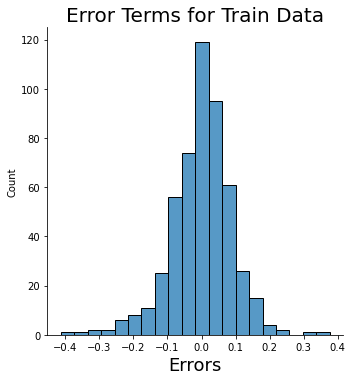

In [336]:
# plot the histogram of the error terms
#fig =plt.figure()
sns.displot((y_train-y_train_bike),bins=20)
plt.title('Error Terms for Train Data',fontsize= 20)   #heading of the Plot
plt.xlabel('Errors',fontsize= 18)
plt.show()

The Histogram above for Train Data Looks like a Normal Distribution with mean 0 and Error term is independent of each other.

## Step 9: Model Evaluation

In [298]:
# checking the dataset of bike_share_test
bike_share_test.head()

,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
310,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,16.195000,75.8750,3.834075,4035
320,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,14.008347,57.5833,20.459254,3053
189,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,30.066653,60.9167,11.250104,5336
382,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,12.436653,44.3333,27.833743,3376
388,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,14.042500,83.5833,8.292389,4339


In [299]:
# We need to scale the numerical variables - 'temp','hum','windspeed' and 'cnt'
# Creating an instance of Minmax object
scaling = MinMaxScaler()

#Storing numerical variables of bike_share in a list
numeric_var=['temp','hum','windspeed','cnt']

#Fitting on Data
bike_share_test[numeric_var]=scaling.fit_transform(bike_share_test[numeric_var])
bike_share_test.head()

,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
310,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0.425132,0.702436,0.029828,0.440595
320,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0.357625,0.447795,0.656192,0.313639
189,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.853381,0.494200,0.309232,0.608791
382,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.309103,0.263340,0.934031,0.355398
388,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0.358679,0.809744,0.197798,0.479897


In [300]:
# Describing the features of bike_share_test data
bike_share_test.describe()

,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.00000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.090909,0.095455,0.077273,0.077273,0.090909,0.059091,0.081818,0.063636,0.095455,0.077273,0.113636,0.145455,0.131818,0.131818,0.168182,0.136364,0.145455,0.031818,0.313636,0.236364,0.218182,0.268182,0.50000,0.036364,0.704545,0.551905,0.507316,0.363187,0.506402
std,0.288135,0.294512,0.267633,0.267633,0.288135,0.236333,0.274713,0.244661,0.294512,0.267633,0.318093,0.353363,0.339064,0.339064,0.374881,0.343957,0.353363,0.175916,0.465029,0.425817,0.413953,0.444023,0.50114,0.187620,0.457287,0.233920,0.202450,0.192010,0.257784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.348922,0.350203,0.224100,0.312088
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.50000,0.000000,1.000000,0.569640,0.484048,0.332783,0.518035
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.747111,0.643416,0.472748,0.707466
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing bike_share_test Data into X and y

In [301]:
y_test = bike_share_test.pop('cnt')
X_test = bike_share_test

In [302]:
# Adding constant variable to the Test dataframe
X_test_const=sm.add_constant(X_test)

In [304]:
# Updating the test dataframe by dropping features that are not required 
X_test_const=X_test_const.drop(['august','december','february','january','june','march','may','november','october','monday','saturday','sunday','thursday','tuesday','wednesday','summer','workingday'],axis=1,)
X_test_const.head()

,const,july,september,light_snow,mist,spring,winter,yr,holiday,temp,hum,windspeed
310,1.0,0,0,0,0,0,1,0,0,0.425132,0.702436,0.029828
320,1.0,0,0,0,1,0,1,0,0,0.357625,0.447795,0.656192
189,1.0,1,0,0,0,0,0,0,0,0.853381,0.494200,0.309232
382,1.0,0,0,0,0,1,0,1,0,0.309103,0.263340,0.934031
388,1.0,0,0,0,0,1,0,1,0,0.358679,0.809744,0.197798


In [305]:
# Building another fitted model
X_test_const = sm.add_constant(X_test_const)
linreg4= sm.OLS(y_test,X_test_const).fit()


In [306]:
linreg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     102.0
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           1.86e-77
Time:                        14:30:21   Log-Likelihood:                 190.69
No. Observations:                 220   AIC:                            -357.4
Df Residuals:                     208   BIC:                            -316.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3090      0.045      6.826      0.000       0.220       0.398
july          -0.0616      0.029     -2.112      0.036      -0.119      -0.004
september      0.0608      0.024      2.508      0.013       0.013       0.109
light_snow    -0.1477      0.049     -3.002      0.003      -0.245      -0.051
mist          -0.0411      0.019     -2.119      0.035      -0.079      -0.003
spring        -0.1566      0.027     -5.759      0.000      -0.210      -0.103
winter         0.0269      0.022      1.221      0.224      -0.017       0.070
yr             0.2741      0.015     18.141      0.000       0.244       0.304
holiday       -0.0665      0.038     -1.748      0.082      -0.142       0.009
temp           0.4632      0.055      8.366      0.000       0.354       0.572
hum           -0.1617      0.052     -3.115      0.002      -0.264      -0.059
windspeed     -0.1782      0.041     -4.365      0.000      -0.259      -0.098
==============================================================================
Omnibus:                       32.724   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.958
Skew:                          -0.845   Prob(JB):                     8.60e-12
Kurtosis:                       4.645   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [307]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_test_const.columns
vif['VIF'] = [variance_inflation_factor(X_test_const.values, i) for i in range(X_test_const.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,41.20
9,temp,3.36
5,spring,2.68
10,hum,2.21
6,winter,1.91
4,mist,1.63
3,light_snow,1.50
1,july,1.42
11,windspeed,1.23
2,september,1.19


In [309]:
# dropping 'winter' feature because it has a high p-value of 0.224 (greater than 0.05)
X_test_update= X_test_const.drop('winter',1,)

In [310]:
# Building another fitted model
X_test_const = sm.add_constant(X_test_update)
linreg4= sm.OLS(y_test,X_test_const).fit()


In [311]:
linreg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     111.8
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           3.58e-78
Time:                        14:34:49   Log-Likelihood:                 189.90
No. Observations:                 220   AIC:                            -357.8
Df Residuals:                     209   BIC:                            -320.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3387      0.038      8.863      0.000       0.263       0.414
july          -0.0606      0.029     -2.077      0.039      -0.118      -0.003
september      0.0615      0.024      2.535      0.012       0.014       0.109
light_snow    -0.1456      0.049     -2.957      0.003      -0.243      -0.049
mist          -0.0424      0.019     -2.187      0.030      -0.081      -0.004
spring        -0.1773      0.021     -8.339      0.000      -0.219      -0.135
yr             0.2767      0.015     18.484      0.000       0.247       0.306
holiday       -0.0659      0.038     -1.729      0.085      -0.141       0.009
temp           0.4239      0.045      9.401      0.000       0.335       0.513
hum           -0.1526      0.051     -2.966      0.003      -0.254      -0.051
windspeed     -0.1830      0.041     -4.497      0.000      -0.263      -0.103
==============================================================================
Omnibus:                       29.628   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.873
Skew:                          -0.797   Prob(JB):                     2.97e-10
Kurtosis:                       4.499   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [312]:
# dropping 'holiday' feature because it has a high p-value of 0.085 (greater than 0.05)
X_test_update= X_test_const.drop('holiday',1,)

In [313]:
# Building another fitted model
X_test_const = sm.add_constant(X_test_update)
linreg4= sm.OLS(y_test,X_test_const).fit()


In [314]:
linreg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     122.7
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           1.37e-78
Time:                        14:36:24   Log-Likelihood:                 188.34
No. Observations:                 220   AIC:                            -356.7
Df Residuals:                     210   BIC:                            -322.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3393      0.038      8.839      0.000       0.264       0.415
july          -0.0632      0.029     -2.156      0.032      -0.121      -0.005
september      0.0575      0.024      2.371      0.019       0.010       0.105
light_snow    -0.1430      0.049     -2.892      0.004      -0.240      -0.046
mist          -0.0441      0.019     -2.268      0.024      -0.082      -0.006
spring        -0.1779      0.021     -8.329      0.000      -0.220      -0.136
yr             0.2767      0.015     18.398      0.000       0.247       0.306
temp           0.4246      0.045      9.372      0.000       0.335       0.514
hum           -0.1534      0.052     -2.969      0.003      -0.255      -0.052
windspeed     -0.1877      0.041     -4.601      0.000      -0.268      -0.107
==============================================================================
Omnibus:                       29.366   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.142
Skew:                          -0.795   Prob(JB):                     4.28e-10
Kurtosis:                       4.477   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [315]:
# dropping 'july' feature
X_test_update= X_test_const.drop('july',1,)

In [316]:
# Building another fitted model
X_test_const = sm.add_constant(X_test_update)
linreg4= sm.OLS(y_test,X_test_const).fit()

In [317]:
linreg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     135.2
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           1.12e-78
Time:                        14:37:44   Log-Likelihood:                 185.93
No. Observations:                 220   AIC:                            -353.9
Df Residuals:                     211   BIC:                            -323.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3445      0.039      8.913      0.000       0.268       0.421
september      0.0687      0.024      2.874      0.004       0.022       0.116
light_snow    -0.1473      0.050     -2.955      0.003      -0.246      -0.049
mist          -0.0431      0.020     -2.199      0.029      -0.082      -0.004
spring        -0.1825      0.021     -8.514      0.000      -0.225      -0.140
yr             0.2814      0.015     18.745      0.000       0.252       0.311
temp           0.3789      0.040      9.382      0.000       0.299       0.458
hum           -0.1371      0.052     -2.658      0.008      -0.239      -0.035
windspeed     -0.1784      0.041     -4.362      0.000      -0.259      -0.098
==============================================================================
Omnibus:                       30.150   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.081
Skew:                          -0.816   Prob(JB):                     2.68e-10
Kurtosis:                       4.465   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_test_const.columns
vif['VIF'] = [variance_inflation_factor(X_test_const.values, i) for i in range(X_test_const.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.18
7,hum,2.12
6,temp,1.74
3,mist,1.62
4,spring,1.62
2,light_snow,1.49
8,windspeed,1.20
1,september,1.13
5,yr,1.10


In [319]:
# dropping 'mist' feature
X_test_update= X_test_const.drop('mist',1,)

In [320]:
# Building another fitted model
X_test_const = sm.add_constant(X_test_update)
linreg4= sm.OLS(y_test,X_test_const).fit()

In [321]:
linreg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     151.1
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           9.44e-79
Time:                        14:39:15   Log-Likelihood:                 183.44
No. Observations:                 220   AIC:                            -350.9
Df Residuals:                     212   BIC:                            -323.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3599      0.038      9.384      0.000       0.284       0.435
september      0.0641      0.024      2.666      0.008       0.017       0.111
light_snow    -0.1020      0.046     -2.228      0.027      -0.192      -0.012
spring        -0.1796      0.022     -8.319      0.000      -0.222      -0.137
yr             0.2815      0.015     18.581      0.000       0.252       0.311
temp           0.3959      0.040      9.900      0.000       0.317       0.475
hum           -0.2035      0.042     -4.829      0.000      -0.287      -0.120
windspeed     -0.1956      0.041     -4.827      0.000      -0.275      -0.116
==============================================================================
Omnibus:                       27.429   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.374
Skew:                          -0.773   Prob(JB):                     4.65e-09
Kurtosis:                       4.340   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [322]:
# dropping 'light_snow' feature
X_test_update= X_test_const.drop('light_snow',1,)

In [323]:
# Building another fitted model
X_test_const = sm.add_constant(X_test_update)
linreg4= sm.OLS(y_test,X_test_const).fit()

In [324]:
linreg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     172.2
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           7.91e-79
Time:                        14:40:28   Log-Likelihood:                 180.89
No. Observations:                 220   AIC:                            -347.8
Df Residuals:                     213   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3716      0.038      9.691      0.000       0.296       0.447
september      0.0645      0.024      2.659      0.008       0.017       0.112
spring        -0.1730      0.022     -8.015      0.000      -0.216      -0.130
yr             0.2827      0.015     18.505      0.000       0.253       0.313
temp           0.4096      0.040     10.271      0.000       0.331       0.488
hum           -0.2391      0.039     -6.076      0.000      -0.317      -0.162
windspeed     -0.2140      0.040     -5.344      0.000      -0.293      -0.135
==============================================================================
Omnibus:                       24.429   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.083
Skew:                          -0.732   Prob(JB):                     1.08e-07
Kurtosis:                       4.164   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual Analysis of test data

In [325]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_test_const, y_test)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_test_const, y_test)

In [328]:
y_pred_bike =lm.predict(X_test_const)

<Figure size 432x288 with 0 Axes>

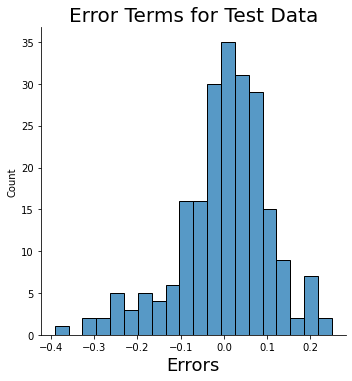

In [335]:
# plot the histogram of the error terms
#fig =plt.figure()
sns.displot((y_test-y_pred_bike),bins=20)
plt.title('Error Terms for Test Data',fontsize= 20)   #heading of the Plot
plt.xlabel('Errors',fontsize= 18)
plt.show()

The Histogram above for Test Data Looks like a Normal Distribution with mean 0 and Error term is independent of each other.

### Plotting the scatter plot between actual values and predicted values

Text(0, 0.5, 'y_pred')

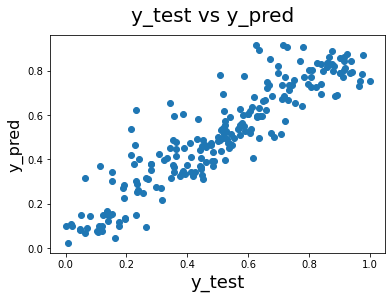

In [330]:
# Plotting y_test and y_pred to understand the dispersion of the data

fig = plt.figure()
plt.scatter(y_test, y_pred_bike)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Looking at the graph, we can observe that there is almost a linear relationship between actual and predicted values and that there is a positive correlation between them.

We can see that the equation of our best fitted line is:

$ bike = 0.3716+ 0.0645 \times  september - 0.1730  \times  spring + 0.2827 \times yr + 0.4096 \times temp - 0.2391 \times hum -0.2140 \times windspeed $


In [333]:
# The Final Value of R-Squared of the Model based on Test Data
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_bike)

0.8290769926499866

### Reporting Adjusted R-Squared and R-Squared Values for Bike Test Data
- R-Squared= 0.829
- Adj. R-Squared = 0.824

### Reporting Adjusted R-Squared and R-Squared Values for Bike Train Data
- R-Squared= 0.832
- Adj. R-Squared= 0.828

### Interpretation of the Predictor Model

Th Number of Bike Rentals is highly dependent on the temperature feature because if all the features are not available and the temperature is 1, then the bike rentals would still be maximum as the coefficient for temperature is the highest of all the other features and then the temperature is followed by the features,namely, year and september for having positive coefficients